**Abstract**

Terrorism is one of the main concerns of any nation’s government. Terrorism causes loss of life, property and creates social anxiety. Governments need to come up with policies and strategies to deter and prevent terrorism. That is why it is indispensable to study terrorism. The terrorist trends provide tools for the analytical study of terrorism which gives us an insight into how terrorism affects the world. Dividing terrorist trends in time groups makes it feasible to narrow down our approach for deeper dive into the problem. Region and country-wise analyses provides a better understanding of how certain geographical region are more or less affected due to terrorism. Once an approach like this is established, it provides a way to study the effects and causes of terrorism. Mapping terrorist activities on the maps also ascertains how some regions are more affected than others. The motive of terrorist groups is also an important factor in creating policies. If there is a common ground to reduce their negative sentiment, then it could prevent terrorism. In addition to all the necessities in studying terrorist trends, integrating Global terrorism dataset with World development Indicators answers hypothesis created around income category, Foreign direct investment, military expenditure, and economy.

In [1]:
## Importing packages

# This R environment comes with all of CRAN and many other helpful packages preinstalled.
# You can see which packages are installed by checking out the kaggle/rstats docker image: 
# https://github.com/kaggle/docker-rstats
library(tidyverse) # metapackage with lots of helpful functions
library(tinytex)
library(tibble)
library(ggplot2)
library(ggrepel)
library(cluster)
library(factoextra)
library(grid)
library(gtable)
library(gridExtra)
library(maps)
library(tidygraph)
library(ggraph)
library(igraph)
library(rnaturalearth)
library(rnaturalearthdata)
library(sf)
library(ggcorrplot)
library(carData)
library(ggridges)
library(ggplot2)
library(tibble) 
library(magrittr)
library(carData)
library(tidytext)
library(janeaustenr)
library(stringr)
library(gutenbergr)
library(tidyr)
library(scales)
library(tidyr)
library(textdata) 
suppressMessages(suppressWarnings(terror.unclean <- read_csv(file = "../input/gtd/globalterrorismdb_0718dist.csv", col_names =TRUE)))
terror <- terror.unclean %>% select(eventid,iyear,iday,imonth,alternative,alternative_txt,country,country_txt,region,region_txt,provstate,city,vicinity,location,latitude,longitude,specificity,attacktype1,attacktype1_txt,targtype1_txt,targtype1,targsubtype1,targsubtype1_txt,corp1,target1,weapdetail,success,suicide,natlty1,natlty1_txt,gname,guncertain1,individual,nperps,claimed,motive,nkill,nkillus,INT_LOG,INT_IDEO)
data("stop_words")
suppressMessages(popular.unclean <- read_csv(file = "../input/world-development-indicators/Popular Indicators.csv", col_names =TRUE))
popular.unclean <- popular.unclean %>% select(`Country Name`,`Series Name`,`Country Code`,(starts_with("20")))
popular.unclean <- popular.unclean %>% rename("2000" = "2000 [YR2000]")  
popular.unclean <- popular.unclean %>% rename("2001" = "2001 [YR2001]")  
popular.unclean <- popular.unclean %>% rename("2002" = "2002 [YR2002]")  
popular.unclean <- popular.unclean %>% rename("2003" = "2003 [YR2003]")  
popular.unclean <- popular.unclean %>% rename("2004" = "2004 [YR2004]")  
popular.unclean <- popular.unclean %>% rename("2005" = "2005 [YR2005]")  
popular.unclean <- popular.unclean %>% rename("2006" = "2006 [YR2006]")  
popular.unclean <- popular.unclean %>% rename("2007" = "2007 [YR2007]")  
popular.unclean <- popular.unclean %>% rename("2008" = "2008 [YR2008]")  
popular.unclean <- popular.unclean %>% rename("2009" = "2009 [YR2009]")  
popular.unclean <- popular.unclean %>% rename("2010" = "2010 [YR2010]")  
popular.unclean <- popular.unclean %>% rename("2011" = "2011 [YR2011]")  
popular.unclean <- popular.unclean %>% rename("2012" = "2012 [YR2012]")  
popular.unclean <- popular.unclean %>% rename("2013" = "2013 [YR2013]")  
popular.unclean <- popular.unclean %>% rename("2014" = "2014 [YR2014]")  
popular.unclean <- popular.unclean %>% rename("2015" = "2015 [YR2015]")  
popular.clean <- popular.unclean
world <- ne_countries(scale='medium',returnclass = 'sf')
test <- world %>% select(sovereignt,economy,income_grp,region_wb)
test<- test %>% rename(country_txt=sovereignt)
terror.alongyears <- terror %>% filter(iyear>1999 & iyear <2016) %>%
  group_by(country_txt,iyear) %>% 
  count(iyear) %>%
  filter(iyear>2007)%>%
  rename(Number_Of_Attacks=n)
#list.files(path = "../input")
## Saving data
# If you save any files or images, these will be put in the "output" directory. You 
# can see the output directory by committing and running your kernel (using the 
# Commit & Run button) and then checking out the compiled version of your kernel.

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.1.9000     ✔ purrr   0.3.3     
✔ tibble  2.1.3          ✔ dplyr   0.8.3     
✔ tidyr   1.0.0          ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.4.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘maps’


The following object is masked from ‘package:cluster’:

    votes.repub


The following object is masked from ‘package:purrr’:

    map



Attaching package: ‘tidygraph’


The following object is masked from ‘package:stats’:

    filter



Attaching package: ‘igraph’


The following object is masked from ‘package:tidygraph’:

    groups


The follo

**Introduction**

Terrorism is the premeditated use or threat to use violence by individuals or subnational groups to obtain a political or social objective through the intimidation of a large audience beyond that of the immediate victims(Sandler,2014). The goal of terrorism is to get the group’s idea across the government of the state that they will resort to violence to achieve their goals. They instill the idea of chaos to threaten the peace of a state. Terrorist activities invoke anxiety in the mind of the public as they question their security. They, in turn, may pressure the government to concede to the demands of the terrorists. The analytical study of terrorism has led to the collection of event data. Analytical study of terrorism provides research that is very
relevant to the policies.

 1. The knowledge of terrorist trends informs forecasting and policy.
 
 2. It analyses the economic consequences of terrorism to ascertain the social costs of terrorism campaigns.
 
 3. Helps government to analyses effectiveness of their defensive and counter-measures.
 
 4. Studying the root causes of terrorism allows policymakers to create policies that reduce grievances and,therefore limit terrorism.

  There are myriad analyses in the root cause of terrorism but empirical literature has come to little consensus. The causes that have been analyzed are poverty, economic discrimination, separatism, income, freedom and political ideologies. However, causes such as military expenditure of a state actor, Gross national income(GNI), and FDI inflows should also be analyzed. Global Terrorism Dataset is used in this research to analyze terrorist trends from 1970-2017 with region and country based analysis. Motivation in terrorist attacks in countries in comparison to their respective region is also examined to determine the impact on the region. GTD is then integrated with World Development Indicators (Bank,2018) to understand terrorist trends and military expenditure, Gross National Income(GNI), and FDI Inflows.
  
  
  
**Background**

Terrorism has been researched with respect to economics, political science, and sociology since the 1960s. There have been two approaches to study terrorism- conceptual approach and analytical approach. Political science used a conceptual approach in the absence of data and theoretical constructs in terrorist behavior. The analytical study was derived from scholars, such as Willian Landes, who viewed terrorists as rational actors. The analytical study was fostered by the collection of events data. Using GTD and WDI, the analytical approach to terrorism provides trend and relationship with other factors. Research on root causes of terrorism has been very prominent. In 1986, Agnes Wilkinson gave a notion that Economic discrimination, religious persecution, nationalist/separatist motives, religious fundamentalism, political ideologies, and other grounds may erupt in terrorism by marginalized groups (Sandler,2014). In 2003, Alan Krueger & Zitka Maleckova also uncovered little relationship between the lack of market opportunities and terrorism. These authors also concluded that it is the lack of these liberties, not poverty, that caused terrorism (Krueger,2003). 
  
   Global Terrorism Database has visualizations in kaggle.com.
   
   1. Region-wise and country-wise analysis has been done in addition to the overall trend of the attack. However, there is an absence of a detailed analysis of two increasing trends - 1980-1996 and 2007-2017. The impact of the top terrorist groups that were active at this time and future is not known.
   
   2. In existing visualizations, the cities in the countries with the highest number of attacks are revealed but they are unable to explain the most dense attack areas. This paper will analyze the relationship between the highest frequency attack areas and other areas.
   
   3. Overall motivation of terrorism in a country and its relationship with other attacks in the regions is also unspecified. This paper compares the motivation of these two elements.
   
   4. In addition to this, there is no visualization integrating GTD with World Development Indicators(WDI) specified .The relationship between indicators, such as military expenditure, GNI,  and FDI inflows with terrorism is analyzed in this paper.
       
**Limitations**

The limitations of the datasets are as follows:
  
1. GTD has 3 limitations. First, GTD has "Unknown" values for many observations in gname and motivation. Second, GTD hasn't recorded all the terrorist incidents from 1970-1980 due to limitation of print media at that time. Finally, all the incidents are not covered because the definition of Terrorism wasn't defined in early research. With advancing research and incidents, a definition has been formulated.

2. WDI(World Development Indicators) has missing values in many of the observation. This significantly limits our inference. When we are testing our hypothesis, there is a lack of observation on the graph. Therefore, there is a chance of misinterpretation.



This is how the world is affected by terrorist events from 1970 to 2017.

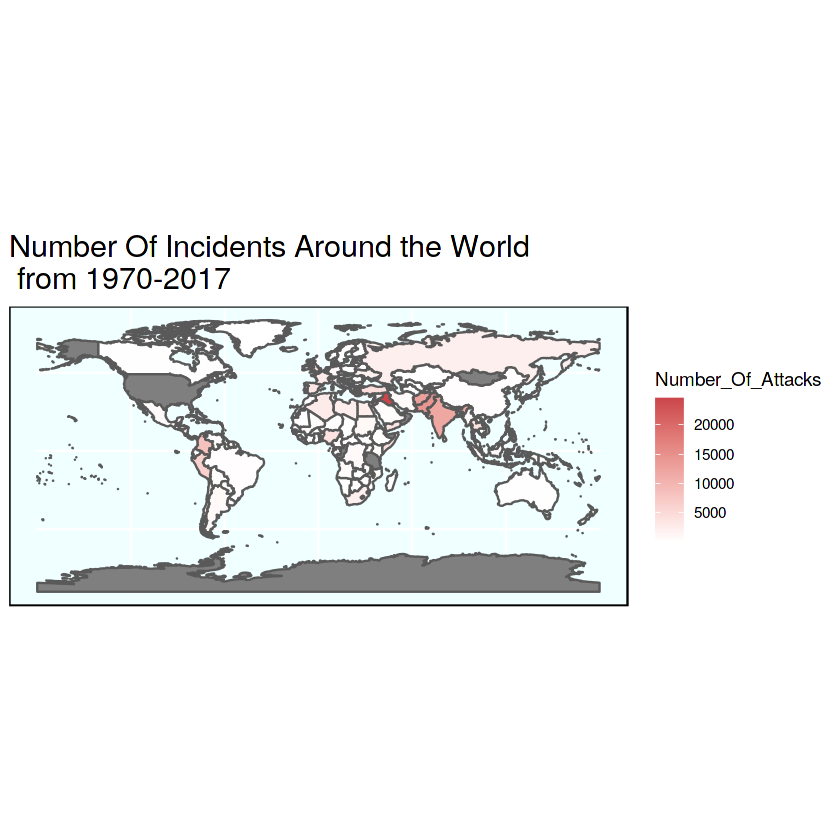

In [2]:
#How world is influenced- mapping number of incidents on the world map
world <- ne_countries(scale='medium',returnclass = 'sf')
t<- terror %>% group_by(country_txt) %>% count(country_txt)
t <- t %>% rename(sovereignt=country_txt)
world <- full_join(world,t,by="sovereignt") 
world <- world %>% rename(Number_Of_Attacks=n)
l <- ggplot(data = world) +
  geom_sf(aes(fill=Number_Of_Attacks))+
  scale_fill_gradient( low = "white", high = "#CB454A" )+
  labs(title = "Number Of Incidents Around the World \n from 1970-2017 ") +
  theme(plot.title=element_text(size=18),panel.background = element_rect(fill = "azure"), panel.border = element_rect(fill = NA))
l


**YEAR-WISE Terrorist Trends**

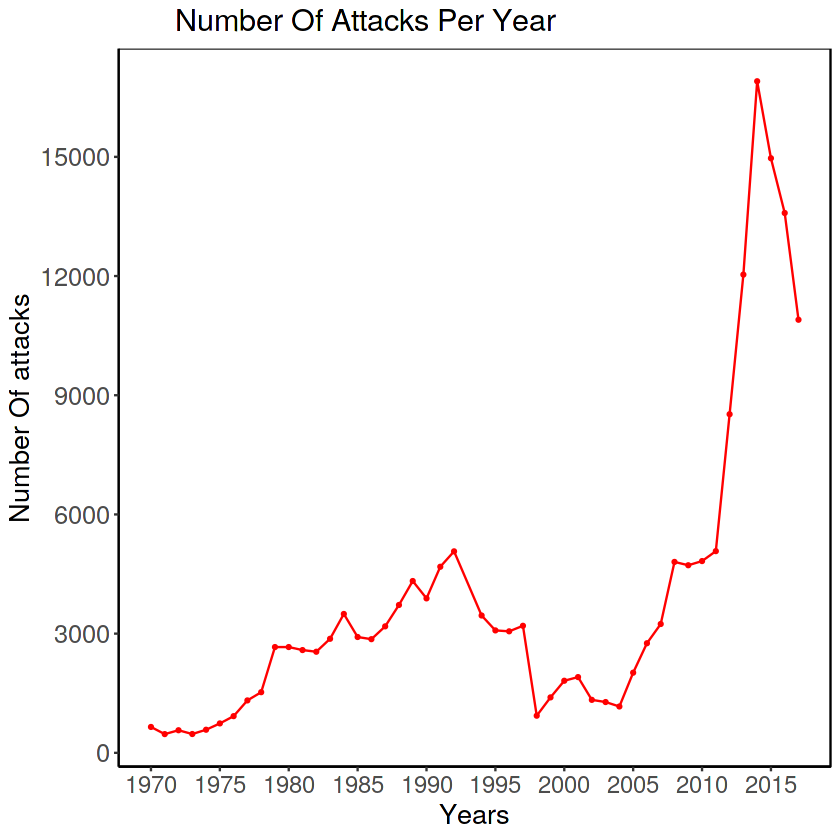

In [3]:
#Creating number of attacks by year
g1 <- terror %>% count (iyear) %>% ggplot(mapping = aes(x=iyear))+
geom_line(mapping =aes(y=n),color="red")+
geom_point(mapping =aes(y=n),size=0.7,color="red")+
labs(x="Years",y="Number Of attacks",title="       Number Of Attacks Per Year",size=10)+
scale_x_continuous(breaks = (seq(from=1950,to=2015,by=5)))+
  scale_y_continuous(breaks = seq(from=0,to=18000,by=3000))+
theme_classic()+
theme(panel.background = element_rect(fill = "white", colour = "black"),axis.line = element_line(color = "black",size = 0.5, linetype = "solid"),axis.title.x = element_text(size=16),axis.text.x = element_text(size=14),axis.title.y = element_text(size=16),axis.text.y = element_text(size=15),axis.title = element_text(size=16),plot.title = element_text(size=18))

g1

The graph above shows that there were two times when the terrorists' activities increased.
1980-1995,
2007-2017

We look for the most active terrorist groups in the countries with maximum terrorist incidents during these years.

1980-1995

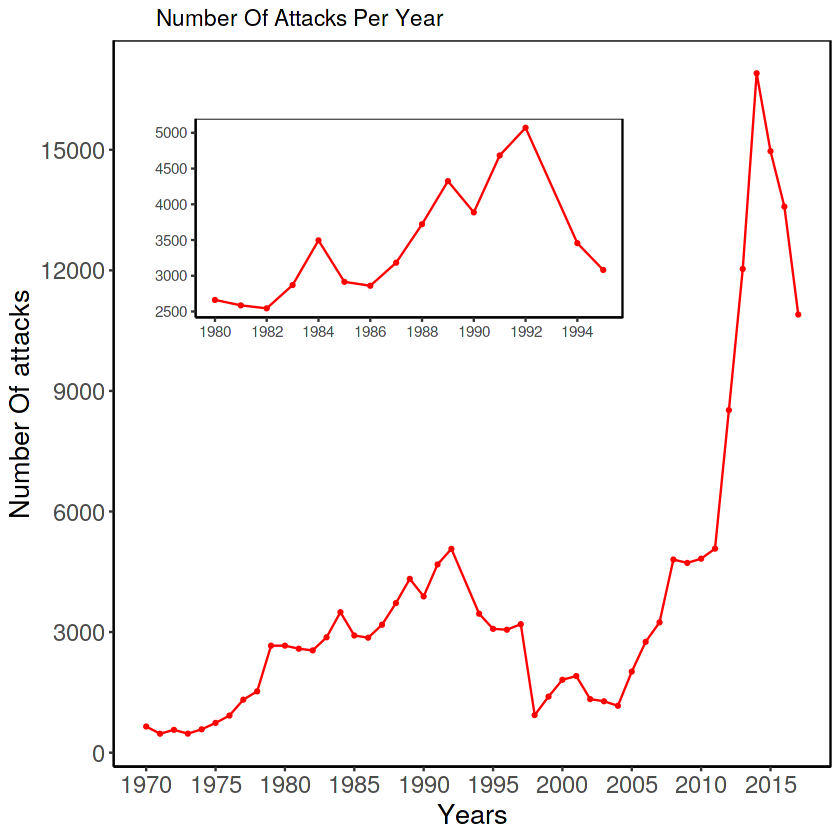

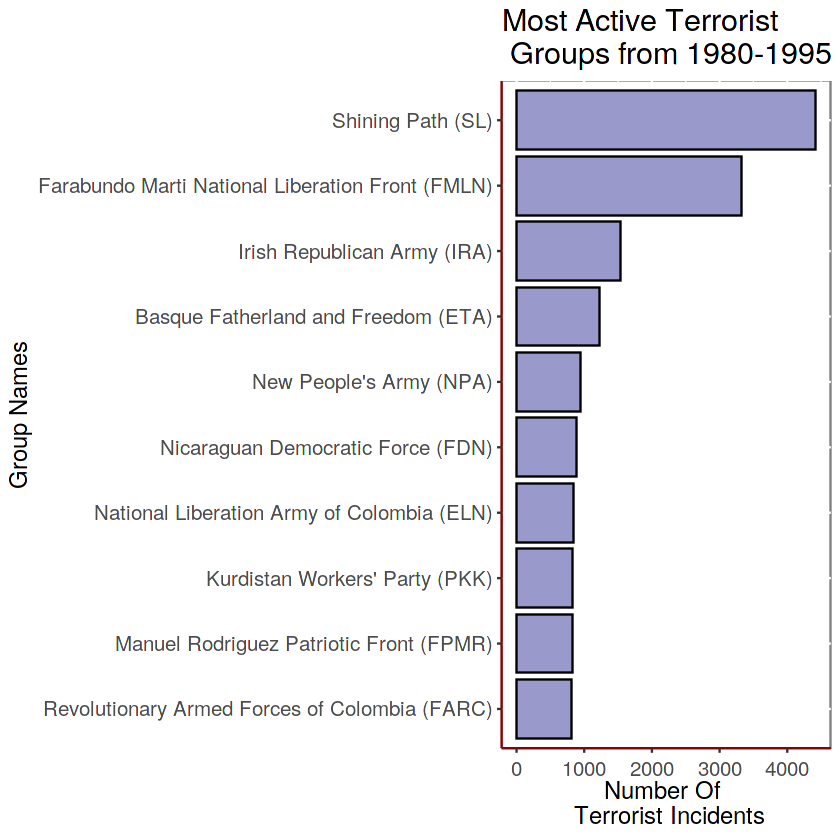

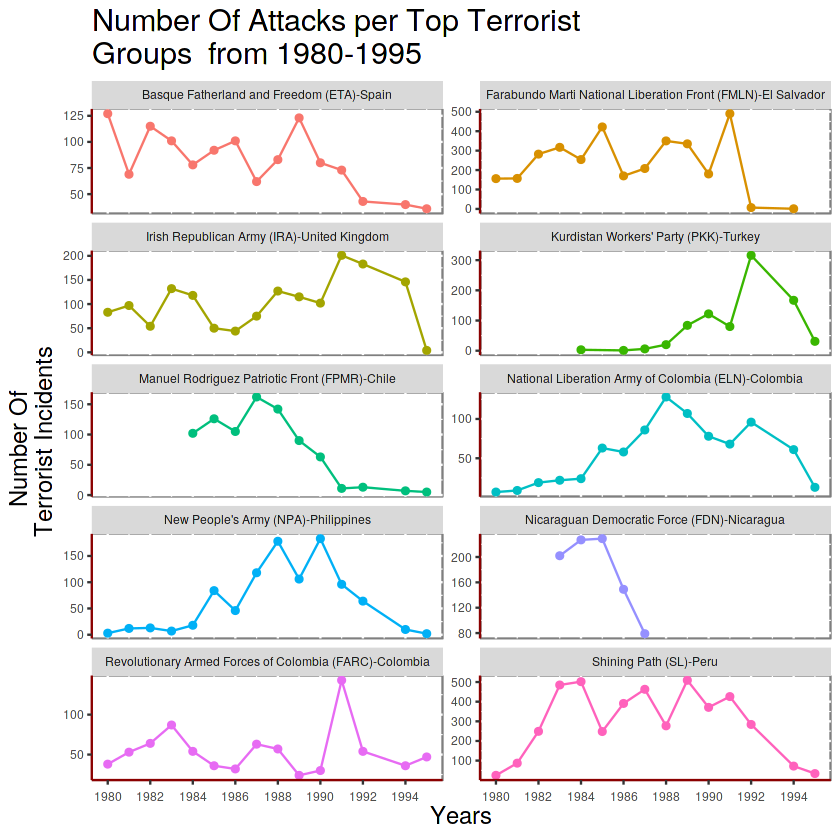

In [4]:
g1 <- terror %>% count (iyear) %>% ggplot(mapping = aes(x=iyear))+geom_line(mapping =aes(y=n),color="red")+geom_point(mapping =aes(y=n),size=0.7,color="red")+labs(x="Years",y="Number Of attacks",title="       Number Of Attacks Per Year",size=6)+scale_x_continuous(breaks = (seq(from=1950,to=2015,by=5)))+
  scale_y_continuous(breaks = seq(from=0,to=18000,by=3000))+ theme_classic()+theme(panel.background = element_rect(fill = "white", colour = "black"),axis.line = element_line(color = "black",size = 0.5, linetype = "solid"),axis.title.x = element_text(size=16),axis.text.x = element_text(size=14),axis.title.y = element_text(size=16),axis.text.y = element_text(size=14),axis.title = element_text(size=16))                         


g2 <- terror %>% filter(iyear < 1996 & iyear > 1979) %>% count (iyear) %>% ggplot(mapping = aes(x=iyear))+geom_line(mapping =aes(y=n),color="red")+geom_point(mapping =aes(y=n),size=0.7,color="red")+scale_x_continuous(breaks = (seq(from=1980,to=1996,by=2)))+
  scale_y_continuous(breaks = seq(from=1000,to=8000,by=500))+theme_classic()+theme(panel.background = element_rect(fill = "white", colour = "black"),axis.line = element_line(color = "black",size = 0.5, linetype = "solid"),axis.title.x = element_blank(),axis.title.y = element_blank())
g1 +
  annotation_custom(
    grob = ggplotGrob(g2),
    xmin = 1970,
    xmax = 2005,
    ymin = 10000,
    ymax = 16000
  )


#Most active terrorist groups
terror79_96 <- terror %>% filter(iyear > 1979 & iyear < 1996)
terror79_96 <- terror79_96 %>% mutate(tename_countrr = paste0(gname,"-",country_txt))
t <- terror79_96 %>% filter(gname!="Unknown") %>% group_by(country_txt,tename_countrr) %>% count(tename_countrr)
t <- t %>% arrange(desc(n)) %>% head(n=10)
t <- terror79_96 %>%filter(gname!='Unknown') %>% group_by(country_txt,gname) %>% count(gname)
t <- t %>% arrange(desc(n)) %>% head(n=10)
p2 <- t %>% ggplot(mapping = aes(x=reorder(gname,n),y=n))+geom_col(color="black",fill="#9999CC")+
         labs(title= "Most Active Terrorist \n Groups from 1980-1995  ",x="Group Names",y="Number Of \n Terrorist Incidents",size=10)+
         theme(plot.title = element_text(size=18),axis.text.x = element_text(size=14,angle = 270, hjust = 0,vjust = 0),axis.text.y = element_text(size=14),axis.line = element_line(color = "darkred",size = 0.5, linetype = "solid"))+
  theme(panel.background = element_rect(fill = "white", colour = "grey50"))+
      coord_flip()+
      #scale_y_continuous(breaks = seq(from=0,to=3300,by=500))+
  theme(axis.title.y = element_text(size=14),axis.title.x = element_text(size=14),axis.text.x = element_text(size=12,angle = 360, hjust = 0.5,vjust = 0),axis.text.y = element_text(size=12))
p2


#year-wise activities of top terrorist groups
t <- terror79_96 %>% filter(gname!="Unknown") %>% group_by(country_txt,tename_countrr) %>% count(tename_countrr)
t <- t %>% arrange(desc(n)) %>% head(n=10)
k <- inner_join(terror79_96,t,by="tename_countrr")
l<- k %>% group_by(iyear,gname) %>% count(gname)
p <- k %>% group_by(iyear,tename_countrr) %>% count(tename_countrr)

p1 <- p %>% ggplot()+
  geom_point(mapping = aes(x=iyear,y=n,col=tename_countrr))+
  geom_line(mapping =aes(x=iyear,y=n,col=tename_countrr))+
  labs(title= "Number Of Attacks per Top Terrorist \nGroups  from 1980-1995",x="Years",y="Number Of \n Terrorist Incidents",size=7,fill="tename_countrr")+
  theme(axis.text.x = element_text(size=7, hjust = 0.5,vjust = 0),axis.text.y = element_text(size=7),axis.line = element_line(color = "darkred",size = 0.5, linetype = "solid"),strip.text = element_text(size = 7))+
  theme(axis.title.y = element_text(size=14),axis.title.x = element_text(size=14),panel.background = element_rect(fill = "white", colour = "grey50"),legend.position="none",plot.title = element_text(size=18))+
  scale_x_continuous(breaks = seq(from=1980,to=1996,by=2))+
  facet_wrap(~tename_countrr,ncol=2,scales = "free_y")
 
p1

For the years 1980-1995, we see that the most Prominent Terrorist groups were Shining Path In Peru and FMLN in El- Salvador in 1980-1995. The graphs also show that by the end of 1996, their activities dropped explaining the end of the increase in attacks from 1980-1996.
The reason for this is as follows:-

1. FMLN was formed in 1980 and one of the main participants in the Salvadorian civil war. In 1992, peace accords were signed which ended the war and FMLN formed a legal left-wing political party in El Salvador. This explains why terrorist activities stopped in 1992.

2. The Shining Path was formed in 1969 but became very active in 1980 after it formed the "Revolutionary Directorate" that was political and military and ordered its militias to transfer to strategic areas in the provinces to start the "armed struggle". In 1992, the Shining Path collapsed after its leader Abimael Guzmán and other leaders were captured by Peru's Intelligence agency GEIN(El Grupo Especial de Inteligencia).

2007-2017

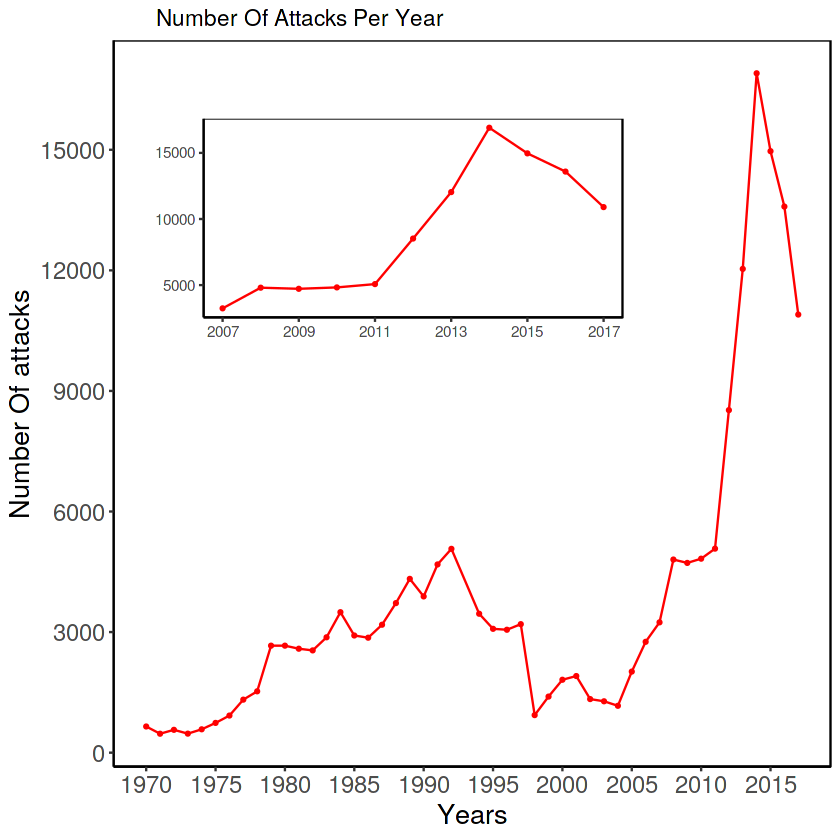

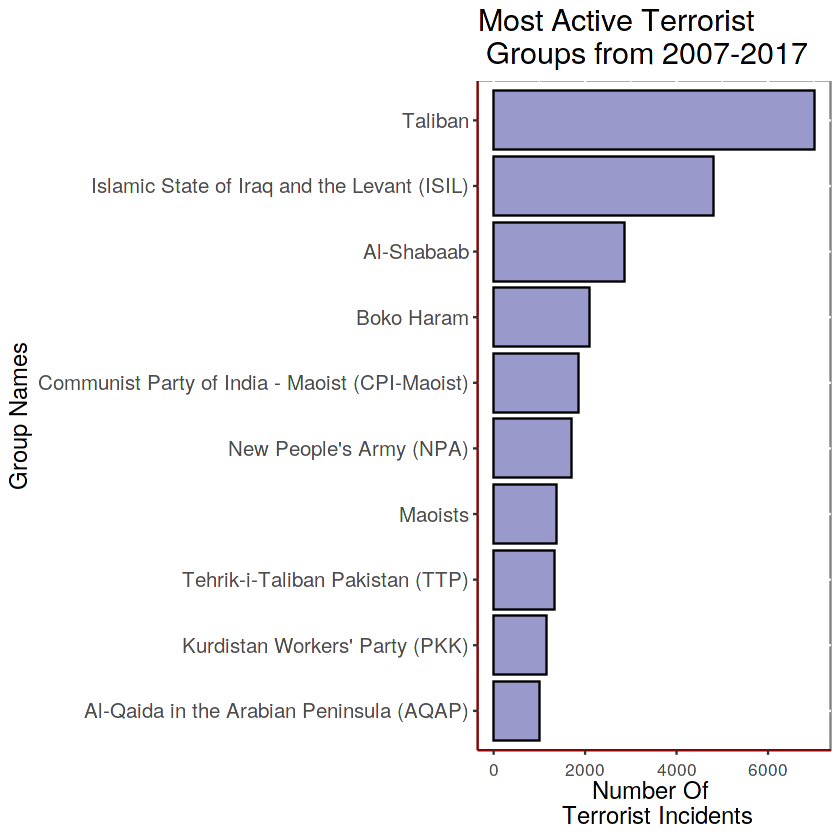

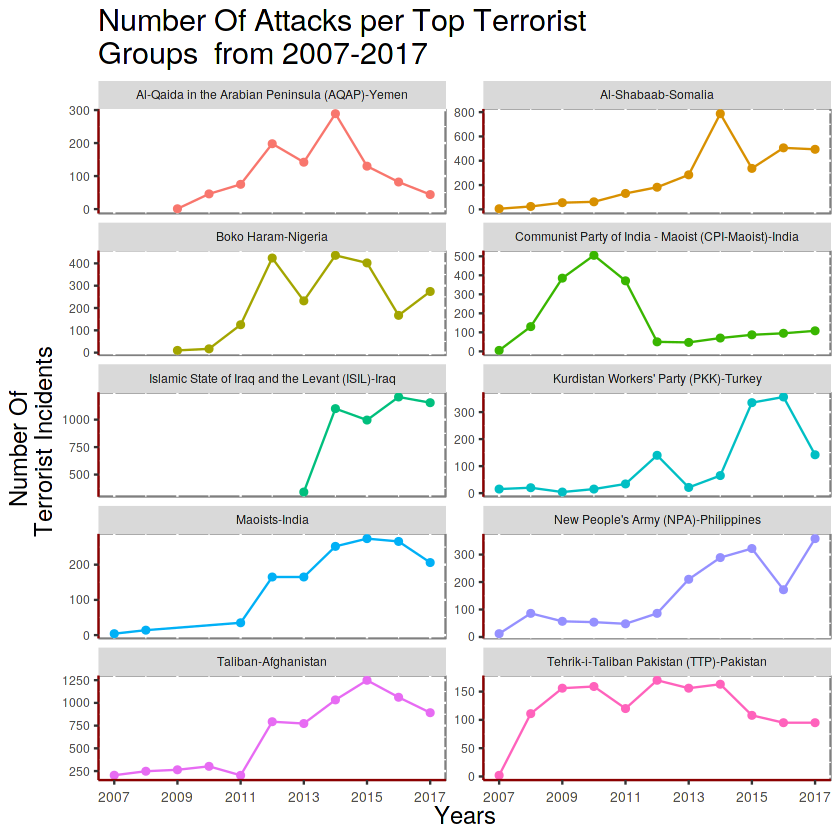

In [5]:
g2 <- terror %>% filter(iyear > 2006) %>% count (iyear) %>% ggplot(mapping = aes(x=iyear))+geom_line(mapping =aes(y=n),color="red")+geom_point(mapping =aes(y=n),size=0.7,color="red")+scale_x_continuous(breaks = (seq(from=2007,to=2017,by=2)))+
  #scale_y_continuous(breaks = seq(from=1000,to=8000,by=500))+
  theme_classic()+theme(panel.background = element_rect(fill = "white", colour = "black"),plot.title = element_text(size=18),axis.line = element_line(color = "black",size = 0.5, linetype = "solid"),axis.title.x = element_blank(),axis.title.y = element_blank())
g1 +
  annotation_custom(
    grob = ggplotGrob(g2),
    xmin = 1970,
    xmax = 2005,
    ymin = 10000,
    ymax = 16000
  )

#Most active terrorist groups
terror07_17 <- terror %>% filter(iyear > 2006 & iyear < 2018)
terror07_17 <- terror07_17 %>% mutate(tename_countrr = paste0(gname,"-",country_txt))
t <- terror07_17 %>% filter(gname!="Unknown") %>% group_by(country_txt,tename_countrr) %>% count(tename_countrr)
t <- t %>% arrange(desc(n)) %>% head(n=10)
t <- terror07_17 %>%filter(gname!='Unknown') %>% group_by(country_txt,gname) %>% count(gname)
t <- t %>% arrange(desc(n)) %>% head(n=10)
p1 <- t %>% ggplot(mapping = aes(x=reorder(gname,n),y=n))+geom_col(color="black",fill="#9999CC")+
  labs(title= "Most Active Terrorist \n Groups from 2007-2017  ",x="Group Names",y="Number Of \n Terrorist Incidents",size=7)+
  theme(axis.text.x = element_text(size=10,angle = 270, hjust = 0,vjust = 0),axis.text.y = element_text(size=10),axis.line = element_line(color = "darkred",size = 0.5, linetype = "solid"))+
  theme(panel.background = element_rect(fill = "white", colour = "grey50"),plot.title = element_text(size=18))+
  coord_flip()+
  #scale_y_continuous(breaks = seq(from=0,to=3300,by=500))+
  theme(axis.title.y = element_text(size=14),axis.title.x = element_text(size=14),axis.text.x = element_text(size=10,angle = 360, hjust = 0.5,vjust = 0),axis.text.y = element_text(size=12),plot.title = element_text(size=18))
p1


#year-wise activities of top terrorist groups
t <- terror07_17 %>% filter(gname!="Unknown") %>% group_by(country_txt,tename_countrr) %>% count(tename_countrr)
t <- t %>% arrange(desc(n)) %>% head(n=10)
k <- inner_join(terror07_17,t,by="tename_countrr")
l<- k %>% group_by(iyear,gname) %>% count(gname)
p <- k %>% group_by(iyear,tename_countrr) %>% count(tename_countrr)


p2<- p %>% ggplot()+
  geom_point(mapping = aes(x=iyear,y=n,col=tename_countrr))+
  geom_line(mapping =aes(x=iyear,y=n,col=tename_countrr))+
  labs(title= "Number Of Attacks per Top Terrorist \nGroups  from 2007-2017",x="Years",y="Number Of \n Terrorist Incidents",size=7,fill="tename_countrr")+
  theme(axis.text.x = element_text(size=8, hjust = 0.5,vjust = 0),axis.text.y = element_text(size=7),axis.line = element_line(color = "darkred",size = 0.5, linetype = "solid"),strip.text = element_text(size = 7))+
  theme(axis.title.y = element_text(size=14),axis.title.x = element_text(size=14),panel.background = element_rect(fill = "white", colour = "grey50"),legend.position="none",plot.title = element_text(size=18))+
  scale_x_continuous(breaks = seq(from=2007,to=2017,by=2))+
  facet_wrap(~tename_countrr,ncol=2,scales = "free_y")

p2

For the years 2007-2017, we see that most Prominent Terrorist groups were Al-Shabaab in Somalia, Taliban in Afghanistan, Maoist in India and ISIL in Iraq in 2007-2017. The graphs also show ISIL, Taliban and Al-Shabaab show an increase in activity in upcoming years.

1. Al-Shabaab in Somalia has forged alliances with Al-Queda, ISIL and Boko Haram since it was founded in 2006. As of 2019, it remains strong and active and has been responsible for exceptionally deadly terrorist attacks such as the Westgate shopping mall attack and the 14 October Mogadishu bombings.

2. Although the Taliban in Afghanistan and ISIL in Iraq are active at present, their terrorist activities have reduced significantly since 2017.
  

**Region-Wise Analysis**

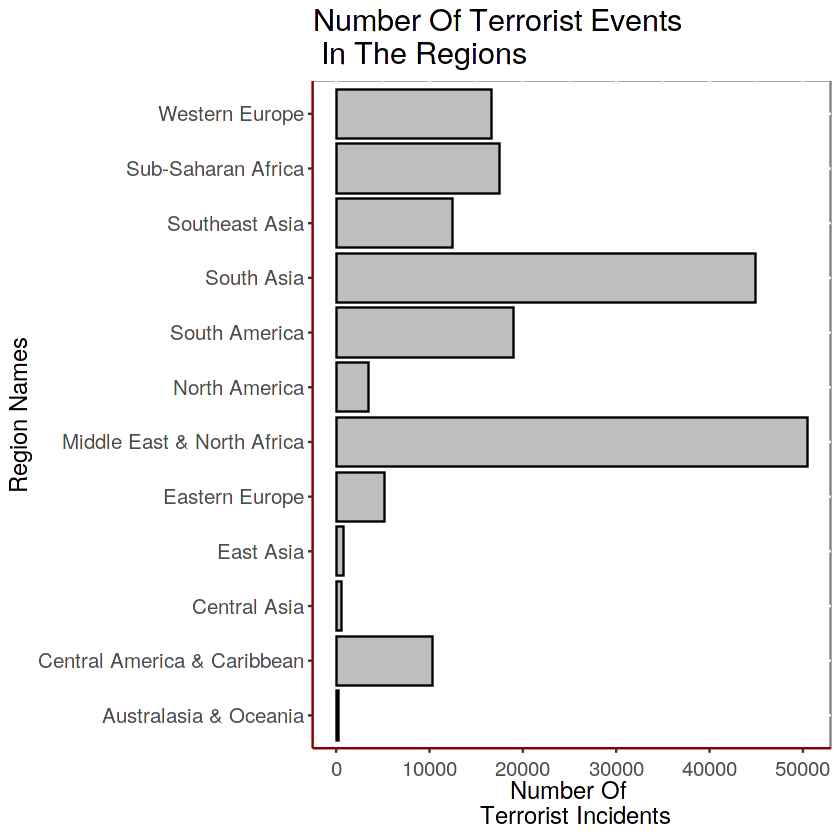

In [6]:

p<- terror %>% ggplot(mapping = aes(x=region_txt))+ geom_bar(color="black",fill="grey")+labs(title= "Number Of Terrorist Events \n In The Regions  ",x="Region Names",y="Number Of \n Terrorist Incidents",size=10)+theme(axis.text.x = element_text(size=10,angle = 270, hjust = 0,vjust = 0),axis.text.y = element_text(size=10),axis.line = element_line(color = "darkred",size = 0.5, linetype = "solid"))+
  theme(panel.background = element_rect(fill = "white", colour = "grey50"))+coord_flip()+
  theme(axis.title.y = element_text(size=14),axis.title.x = element_text(size=14),axis.text.x = element_text(size=12,angle = 360, hjust = 0.5,vjust = 0),axis.text.y = element_text(size=12),plot.title = element_text(size=18))
p

We see that the significant number of attacks were prominent in South Asia, MiddleEast and North Africa. However, this analysis is not enough to find trends in terrorist attacks. To find out the most affected regions in recent years we need to look at the year-wise breakdown of the number of terrorist activities. 

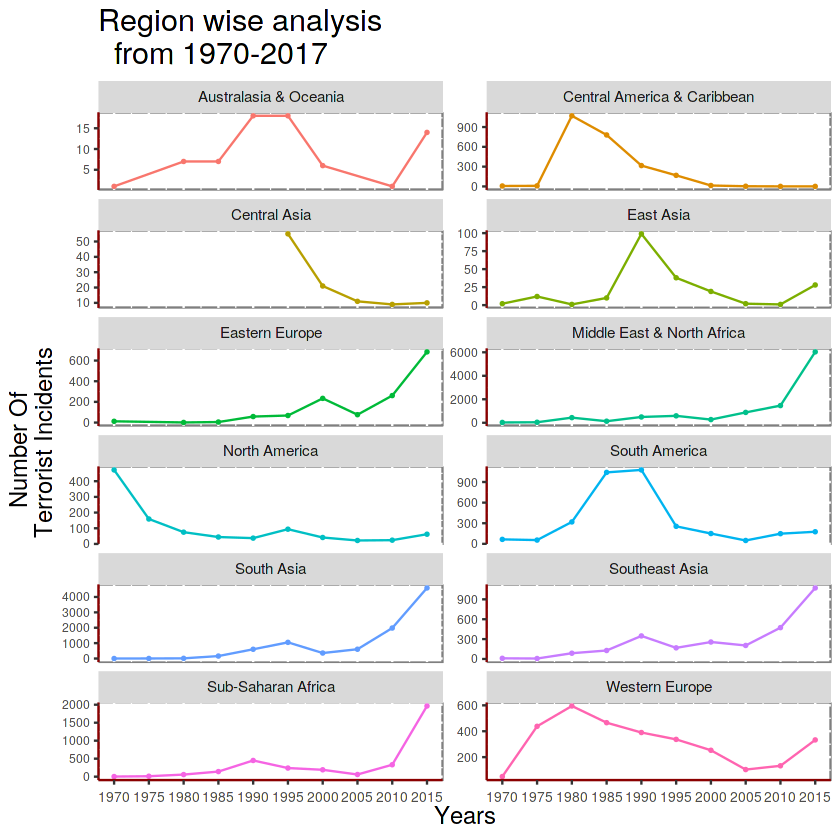

In [7]:
# number of attacks yearly Region wise 
yeardiff5 <- c(seq(from=1970,to=2017,by=5))
reg.ter <- terror %>% filter(iyear %in% yeardiff5)
reg.ter <- reg.ter %>% group_by(iyear,region_txt) %>% count(region_txt) 
p1 <- reg.ter %>% ggplot()+
  geom_point(mapping = aes(x=iyear,y=n,col=region_txt),size=0.5)+
  geom_line(mapping =aes(x=iyear,y=n,col=region_txt))+
  labs(title= "Region wise analysis \n  from 1970-2017",x="Years",y="Number Of \n Terrorist Incidents",size=7)+
  theme(axis.text.x = element_text(size=8, hjust = 0.5,vjust = 0),axis.text.y = element_text(size=7),axis.line = element_line(color = "darkred",size = 0.5, linetype = "solid"))+
  theme(axis.title.y = element_text(size=14),axis.title.x = element_text(size=14),panel.background = element_rect(fill = "white", colour = "grey50"),legend.position="none",plot.title = element_text(size=18))+
  scale_x_continuous(breaks = seq(from=1970,to=2015,by=5))+
  facet_wrap(~region_txt,ncol=2,scales = "free_y")
p1

In addition to South Asia, MiddleEast and North Africa, attacks are also increasing Southeast Asia and Sub-Saharan Africa.

**Country-Wise Analysis**

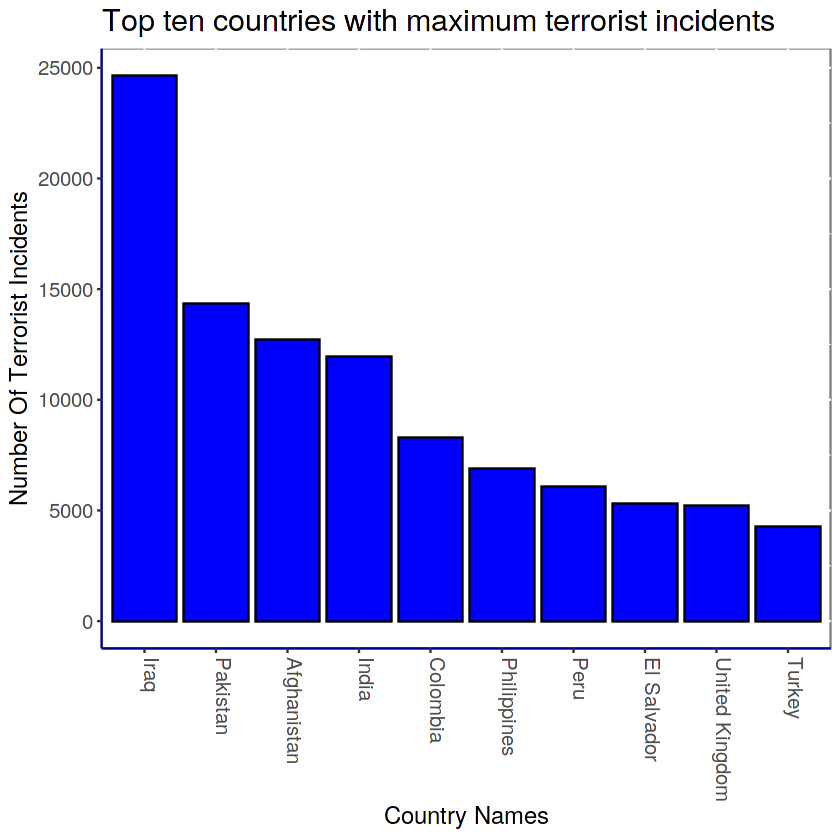

In [8]:
#countries with maximun incidents
t <- terror %>% count(country_txt)
t <- t %>% arrange(desc(n))
top.ten <- head(t,10)
p<- ggplot(top.ten,mapping = aes(x=reorder(country_txt,-n),y=n))
p+geom_col(fill="blue",color="black")+
labs(title= "Top ten countries with maximum terrorist incidents",x="Country Names",y="Number Of Terrorist Incidents")+
theme(panel.background = element_rect(fill = "white", colour = "grey50"),axis.title.y=element_text(size=14),axis.title.x=element_text(size=14),axis.text.y=element_text(size=12),axis.text.x = element_text(angle = 270,hjust = 0,vjust = 0,size=12),axis.line = element_line(color = "darkblue",size = 0.5, linetype = "solid"),plot.title = element_text(size=18))


The top three countries with maximum terrorist activities are Iraq, Pakistan, and Afghanistan. As these countries are most affected by terrorism, we will perform a detailed analysis of these countries.

IRAQ Analysis

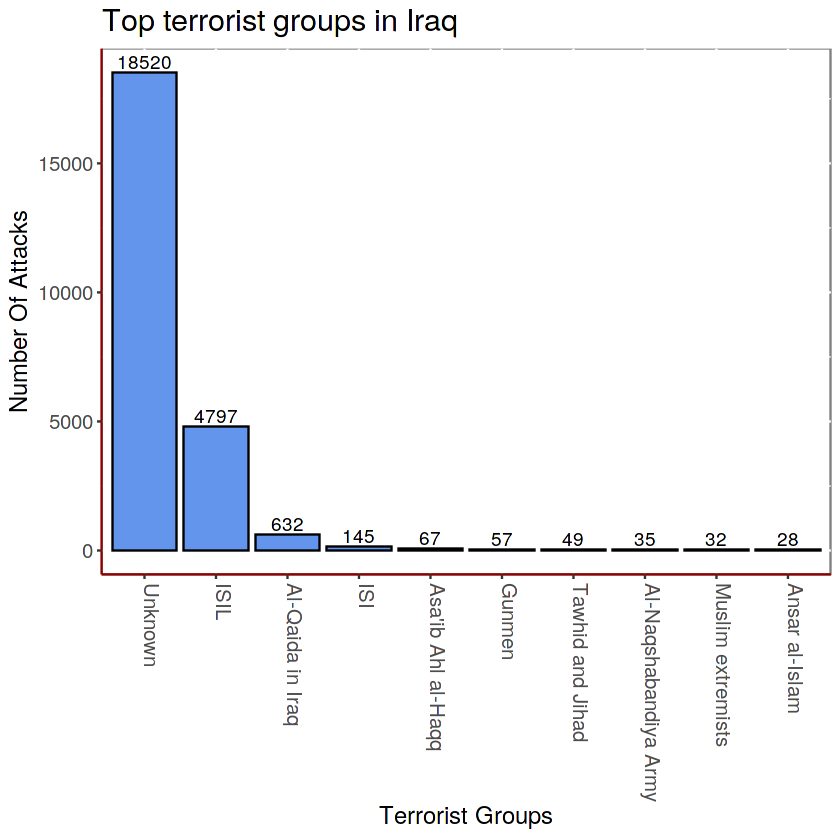

In [9]:

terror.iraq <-terror %>% filter(country_txt=="Iraq") 
#Terrorist Group active
terror.iraq <- terror.iraq %>% mutate(gname = ifelse(gname == "Islamic State of Iraq and the Levant (ISIL)","ISIL",gname))
terror.iraq <- terror.iraq %>% mutate(gname = ifelse(gname == "Islamic State of Iraq (ISI)","ISI",gname))
topterror.iraq <-terror.iraq %>% count(gname) %>% arrange(desc(n)) %>% head(10)
topterror.iraq %>% 
  ggplot(mapping = aes(x=reorder(gname,-n),y=n))+
  geom_col(fill="cornflowerblue",col="black")+
  geom_text(aes( label = n, vjust = -0.25)) + 
  labs(title = "Top terrorist groups in Iraq", y= "Number Of Attacks",x ="Terrorist Groups")+
  theme(panel.background = element_rect(fill = "white", colour = "grey50"),plot.title = element_text(size=18),axis.title.y=element_text(size=14),axis.title.x=element_text(size=14),axis.text.y=element_text(size=12),axis.text.x = element_text(angle = 270,hjust = 0,vjust = 0,size=12),axis.line = element_line(color = "darkred",size = 0.5, linetype = "solid"))


The top terrorist groups in Iraq were Islamic State Of Iraq and Levant(ISIL), Al-Qaida, Islamic State of Iraq(ISI) and Asa'ib Ahl al-Haq. We'll use these for further analysis. 
For 18520 attacks, no terrorist group claimed responsibility. Because it is a significant number, we cannot rule it out.

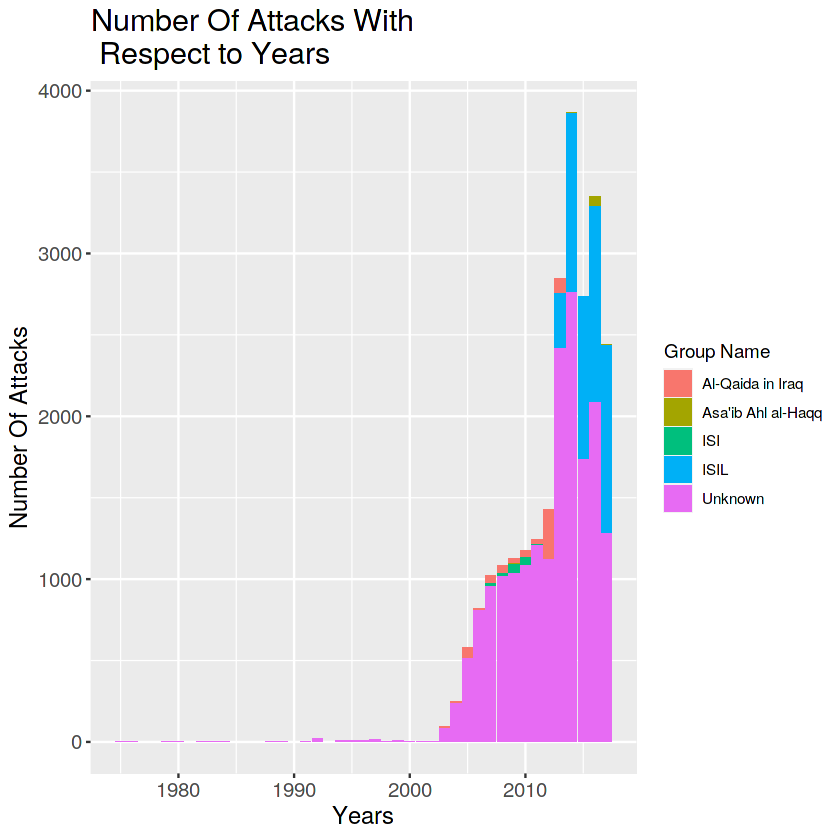

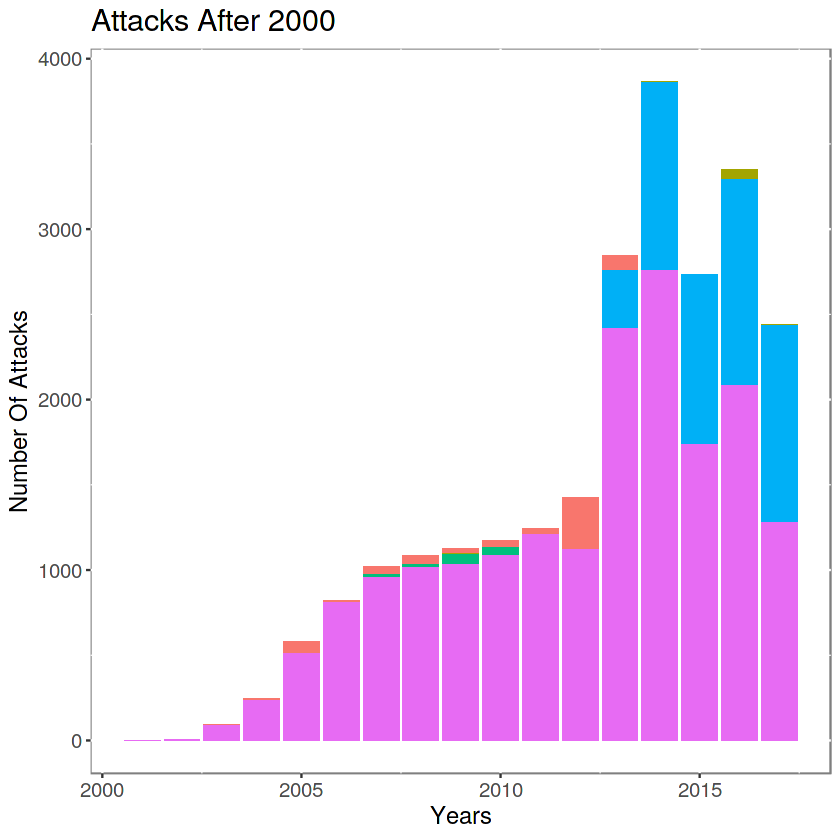

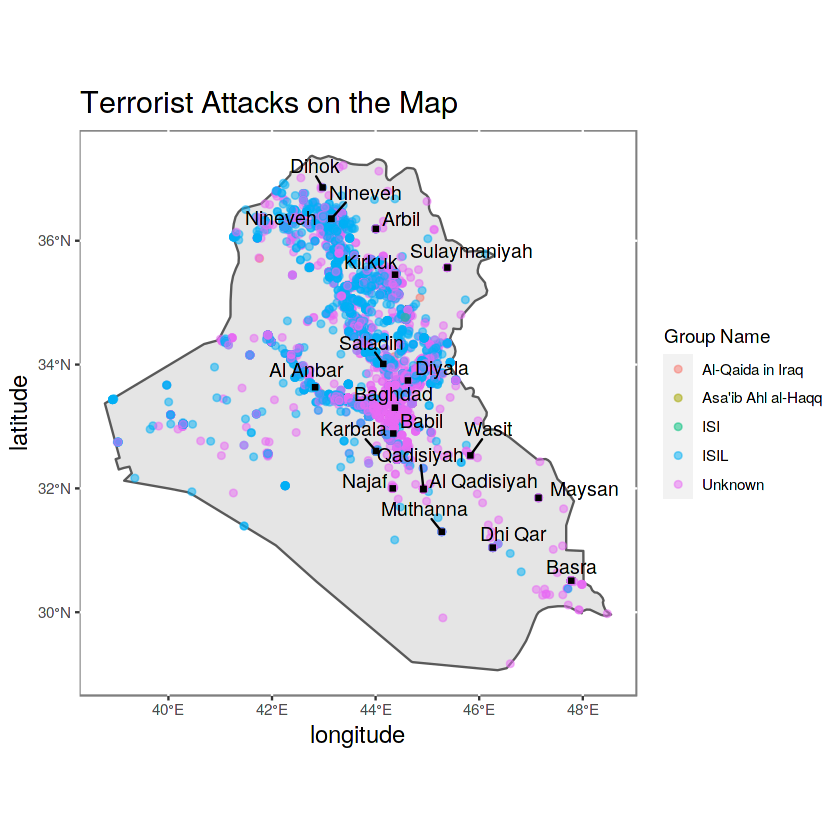

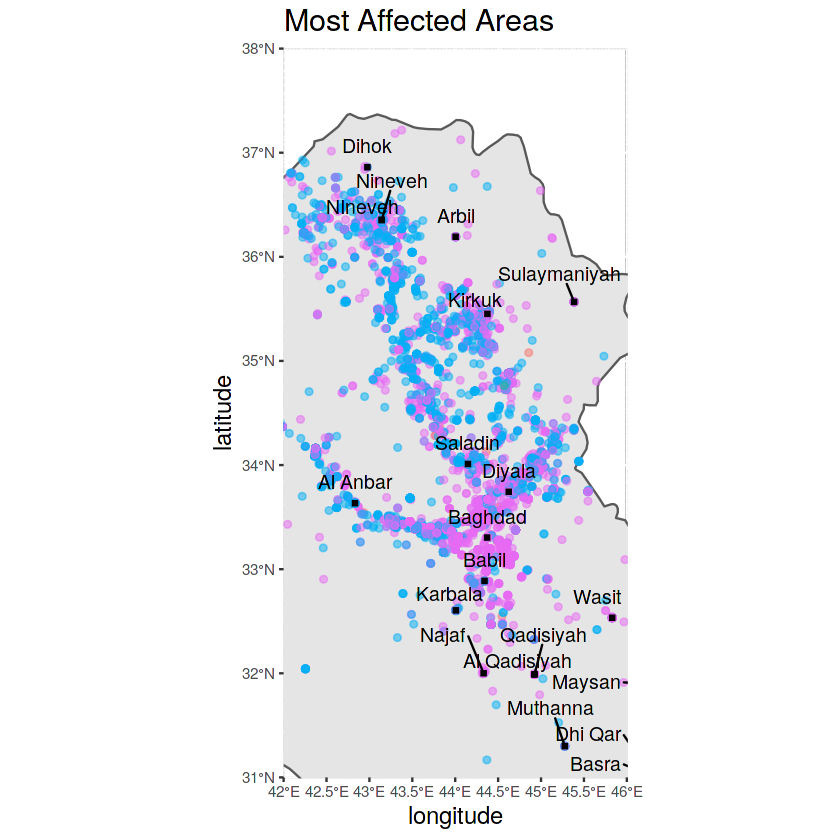

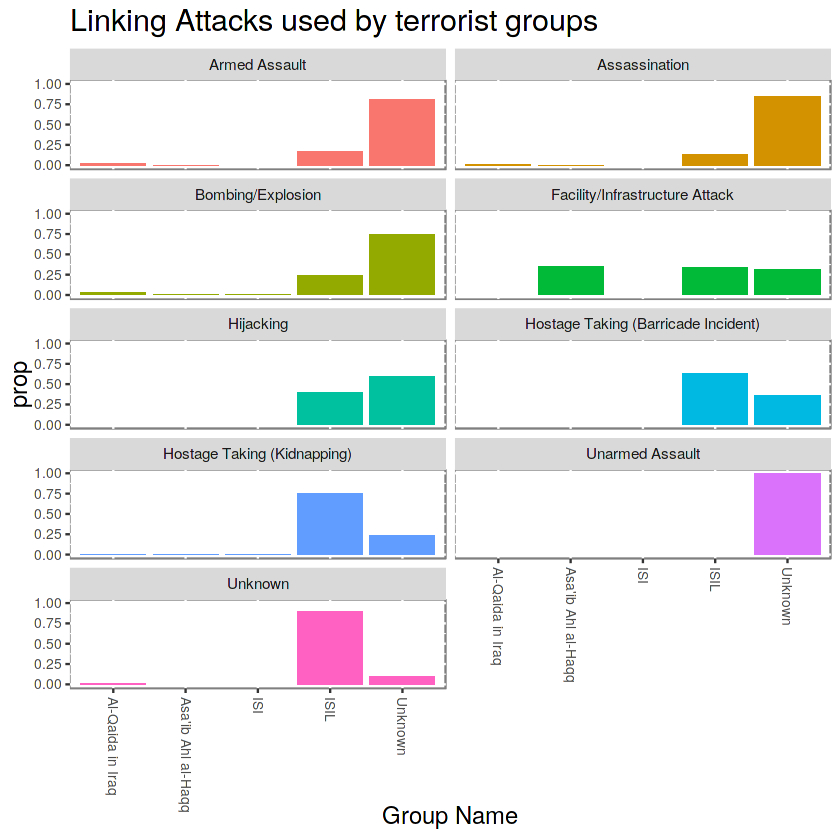

In [10]:
topterror.iraq <- terror.iraq %>% filter(gname=="Unknown" | gname=="ISIL" |gname=="Al-Qaida in Iraq" |gname=="ISI"| gname=="Asa'ib Ahl al-Haqq")

#Yearly share of attacks by top active groups
topterror.iraq %>% ggplot(mapping = aes(x=iyear))+
  geom_bar(mapping = aes(fill=gname))+
  labs(x="Years",y="Number Of Attacks",title="Number Of Attacks With \n Respect to Years")+scale_fill_discrete(name="Group Name")+
  theme(axis.title.y = element_text(size=14),axis.title.x = element_text(size=14),plot.title = element_text(size=18),axis.text.x=element_text(size=12),axis.text.y=element_text(size=12))
topterror.iraq %>% filter(iyear >2000) %>% ggplot(mapping = aes(x=iyear))+
  geom_bar(mapping = aes(fill=gname))+
  labs(x="Years",y="Number Of Attacks",title="Attacks After 2000")+scale_fill_discrete(name="Group Name")+
  theme(axis.title.y = element_text(size=14),axis.title.x = element_text(size=14),axis.text.x = element_text(size=12),axis.text.y = element_text(size=12),legend.position = 'none',panel.background = element_rect(fill = "white", colour = "grey50"),plot.title = element_text(size=18))

#mapping attacks on the Iraq map
topterror.iraq <-topterror.iraq %>% filter(longitude < 50 & iyear > 2010)
t <- topterror.iraq  %>% group_by(provstate) %>% distinct(provstate,.keep_all = TRUE)
world <- ne_countries(scale='medium',returnclass = 'sf')
Iraq <- subset(world, admin == "Iraq")
ggplot(data = Iraq) +
  geom_sf()+
  geom_point(data = topterror.iraq,mapping = aes(x=longitude,y= latitude,color=gname),alpha = 0.5)+
  geom_point(data = t ,mapping = aes(x=longitude,y= latitude),shape=15)+
  geom_text_repel(data = t ,mapping = aes(x=longitude,y= latitude,label=provstate),size =4,nudge_y =0.2)+
  labs(title="Terrorist Attacks on the Map")+
  scale_color_discrete(name="Group Name")+
  theme(axis.title.y = element_text(size=14),axis.title.x = element_text(size=14),panel.background = element_rect(fill = "white", colour = "grey50"),plot.title = element_text(size=18))

#most affected areas in Iraq
ggplot(data = Iraq) +
  geom_sf()+
  geom_point(data = topterror.iraq,mapping = aes(x=longitude,y= latitude,color=gname),alpha = 0.5)+
  coord_sf(xlim = c(42, 46), ylim = c(31, 38), expand = FALSE) +
  geom_point(data = t ,mapping = aes(x=longitude,y= latitude),shape=15)+
  geom_text_repel(data = t ,mapping = aes(x=longitude,y= latitude,label=provstate),size =4,nudge_y =0.2)+
  scale_color_discrete(name="Group Name")+
  labs(title="Most Affected Areas")+
  theme(axis.title.y = element_text(size=14),axis.title.x = element_text(size=14),legend.position = 'none',panel.background = element_rect(fill = "white", colour = "grey50"),plot.title = element_text(size=18))


#LInking type of attack with terrorist groups
topterror.iraq %>% ggplot(mapping = aes(x=gname,fill=attacktype1_txt))+
  geom_bar(position = "dodge",mapping = aes(y=..prop..,group=attacktype1_txt))+
  facet_wrap(~ attacktype1_txt,ncol=2)+
  labs(fill="Type Of Attacks")+
  theme(legend.position = "none")+
  labs(x="Group Name",title="Linking Attacks used by terrorist groups")+
  theme(axis.title.y = element_text(size=14),axis.title.x = element_text(size=14),axis.text.y = element_text(size=8),panel.background = element_rect(fill = "white", colour = "grey50"),plot.title = element_text(size=18),axis.text.x = element_text(size=8, hjust = 0,angle = 270,vjust = 0.5),legend.text = element_text(size = 10),legend.text.align = 0,legend.title = element_blank())


PAKISTAN Analysis****

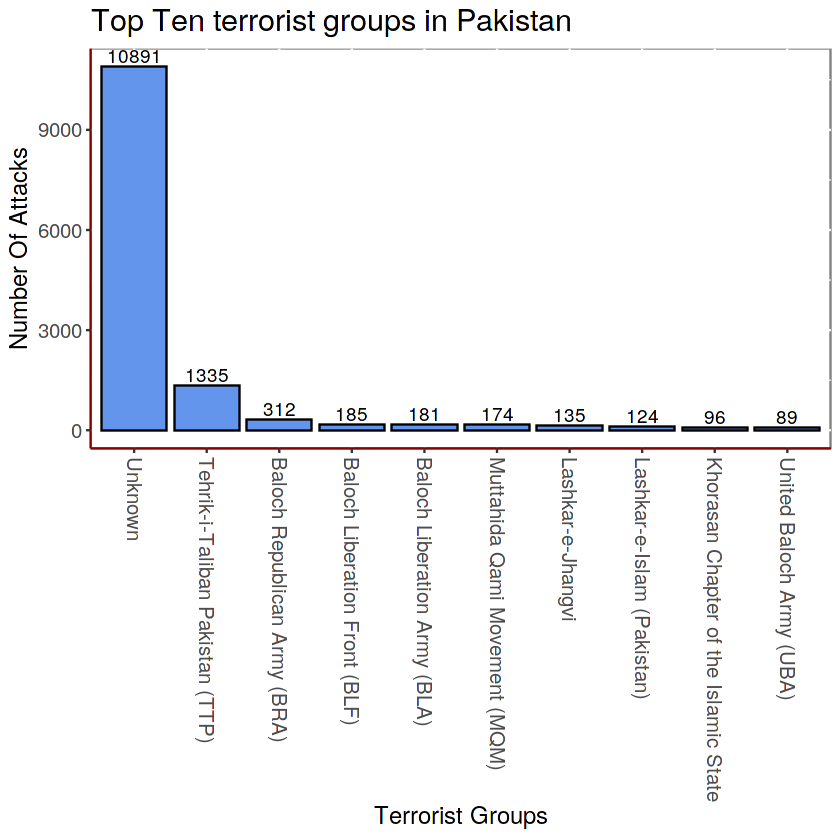

In [11]:
#top terrorist groups in Paksitan
terror.pak <-terror %>% filter(country_txt=="Pakistan") 
topterror.pak <-terror.pak %>% count(gname) %>% arrange(desc(n)) %>% head(10)
topterror.pak %>%
  ggplot(mapping = aes(x=reorder(gname,-n),y=n))+
  geom_col(fill="cornflowerblue",col="black")+
  geom_text(aes( label = n, vjust = -0.25)) + 
  labs(title = "Top Ten terrorist groups in Pakistan", y= "Number Of Attacks",x ="Terrorist Groups")+
  theme(axis.title.y = element_text(size=14),axis.title.x = element_text(size=14),panel.background = element_rect(fill = "white", colour = "grey50"),plot.title = element_text(size=18),axis.text.x = element_text(size=12, hjust = 0,angle = 270,vjust = 0.5),axis.text.y = element_text(size=12),axis.line = element_line(color = "darkred",size = 0.5, linetype = "solid"))
topterror.pak <-terror.pak %>% count(gname) %>% arrange(desc(n)) %>% head(6)
topterror.pak <- inner_join(terror.pak,topterror.pak,"gname")


The top terrorist groups in Pakistan were Tehrik-i-Taliban Pakistan(TTP), Baloch Republican Army(BRA), Baloch Liberation Front(BLF), Baloch Liberation Army(BLA), Muttahida Qami Movement(MQM). We'll use these for further analysis. 
For 10981 attacks, no terrorist group claimed responsibility. Because it is a significant number, we cannot rule it out.

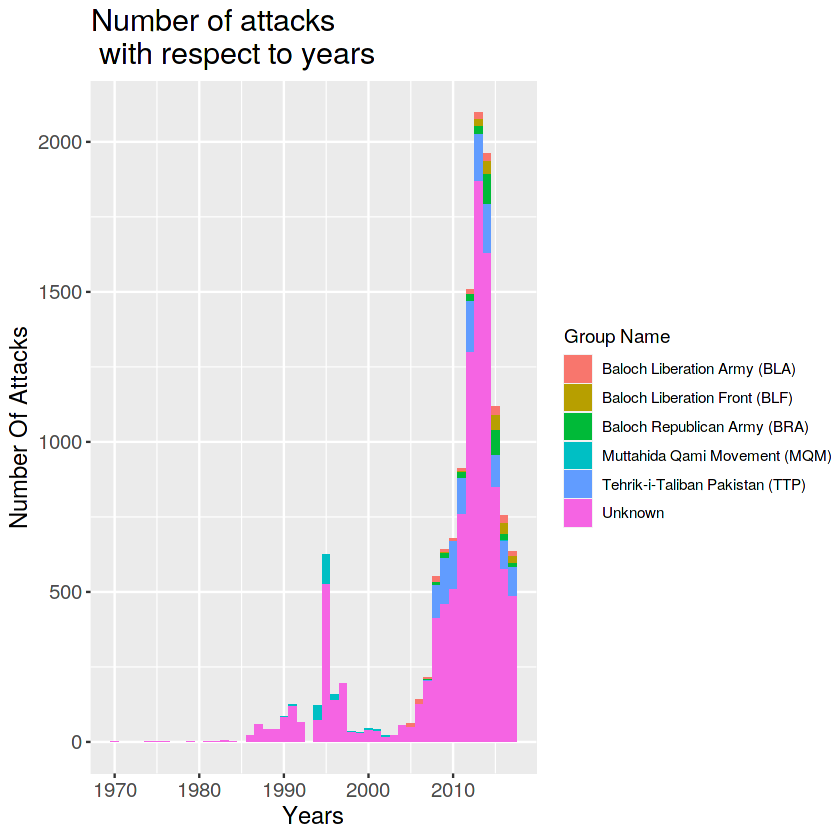

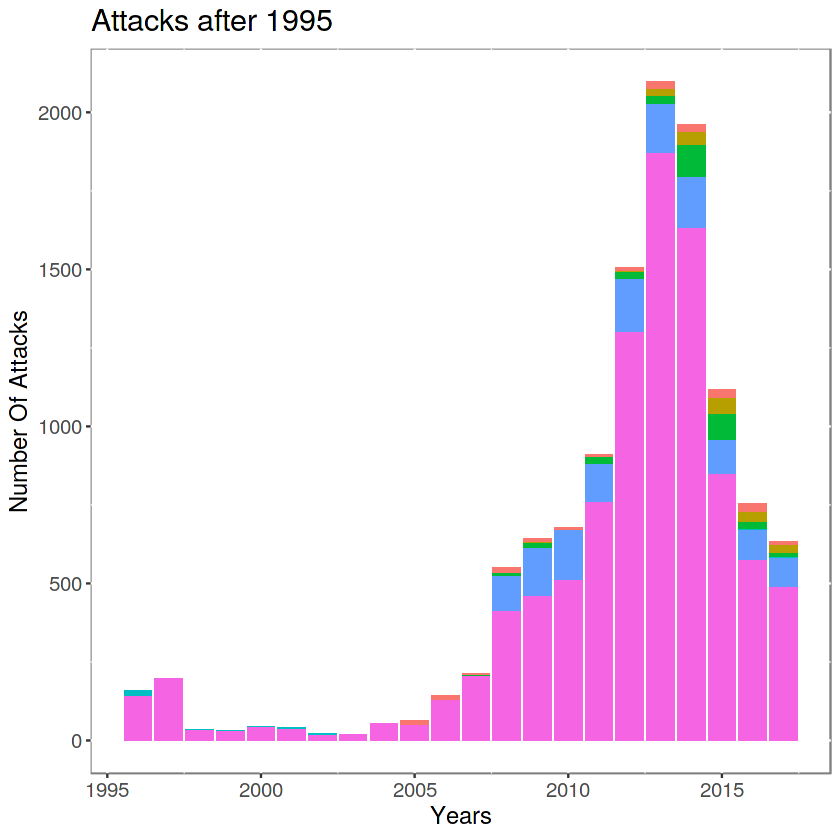

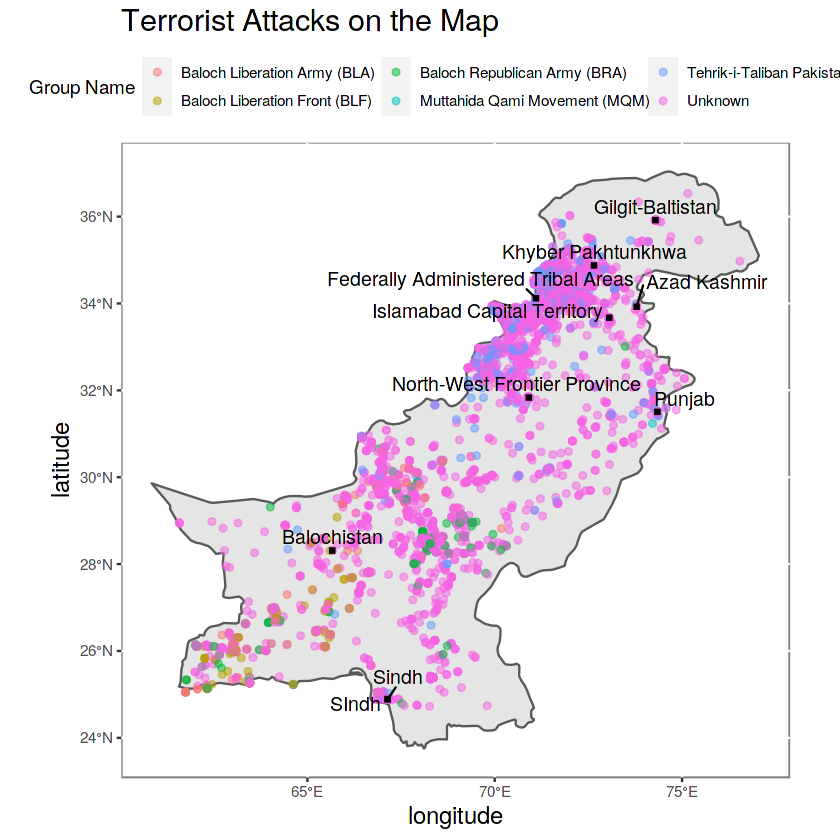

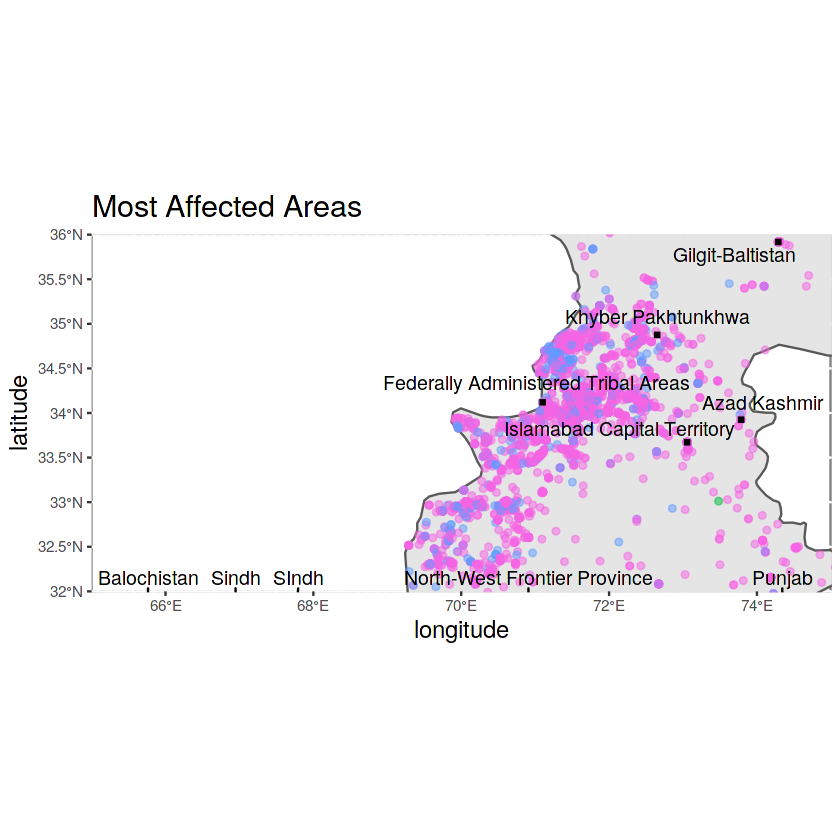

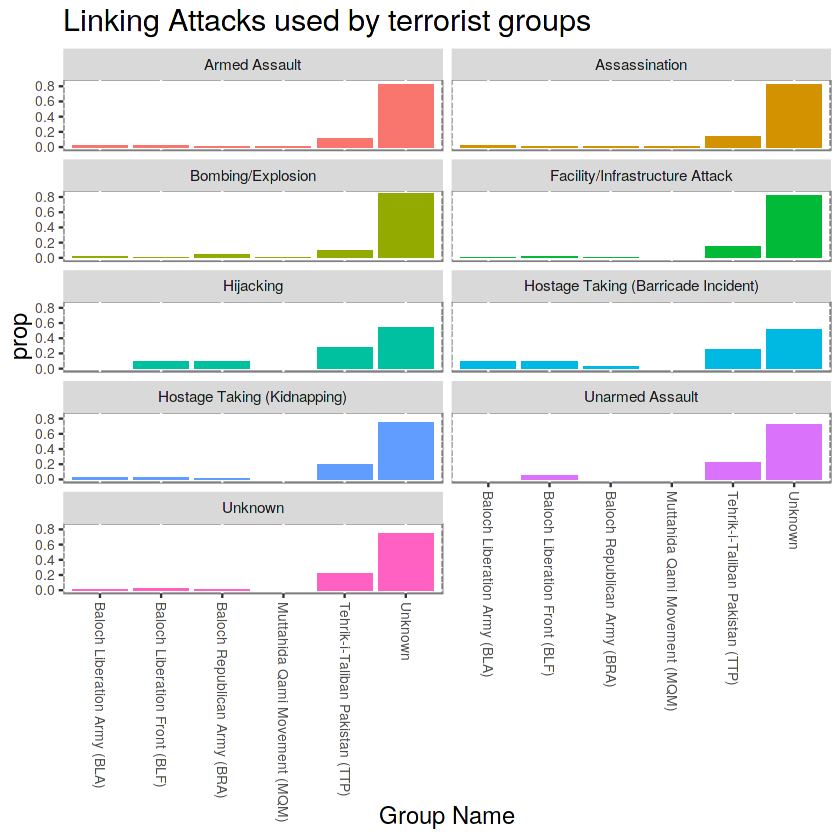

In [12]:
#Yearly share of attacks by top active groups
topterror.pak %>% ggplot(mapping = aes(x=iyear))+
  geom_bar(mapping = aes(fill=gname))+
  labs(title="Number of attacks \n with respect to years",x="Years",y="Number Of Attacks")+scale_fill_discrete(name="Group Name")+
  theme(axis.title.y = element_text(size=14),axis.title.x = element_text(size=14),axis.text.x = element_text(size=12),axis.text.y = element_text(size=12),plot.title = element_text(size=18))
topterror.pak %>% filter(iyear >1995) %>% ggplot(mapping = aes(x=iyear))+
  geom_bar(mapping = aes(fill=gname))+
  labs(title = "Attacks after 1995",x="Years",y="Number Of Attacks")+scale_fill_discrete(name="Group Name")+
  theme(axis.title.y = element_text(size=14),axis.title.x = element_text(size=14),axis.text.x = element_text(size=12),axis.text.y = element_text(size=12),legend.position = "none",panel.background = element_rect(fill = "white", colour = "grey50"),plot.title = element_text(size=18))


#mapping terrorist attacks on the map
topterror.pak <-topterror.pak %>% filter(iyear > 1995)
topterror.pak<- topterror.pak[!is.na(topterror.pak$longitude), ]
topterror.pak<- topterror.pak[!is.na(topterror.pak$latitude), ]

t <- topterror.pak %>% group_by(provstate) %>% distinct(provstate,.keep_all = TRUE)
world <- ne_countries(scale='medium',returnclass = 'sf')
Pak <- subset(world, admin == "Pakistan")
ggplot(data = Pak) +
  geom_sf()+
  geom_point(data = topterror.pak,mapping = aes(x=longitude,y= latitude,color=gname),alpha = 0.5)+
  geom_point(data = t ,mapping = aes(x=longitude,y= latitude),shape=15)+
  geom_text_repel(data = t ,mapping = aes(x=longitude,y= latitude,label=provstate),size =4,nudge_y =0.2)+
  scale_color_discrete(name="Group Name")+
  labs(title="Terrorist Attacks on the Map")+
  theme(axis.title.y = element_text(size=14),axis.title.x = element_text(size=14),legend.position = "top",panel.background = element_rect(fill = "white", colour = "grey50"),plot.title = element_text(size=18))

#mapping area with most dense attacks
ggplot(data = Pak) +
  geom_sf()+
  geom_point(data = topterror.pak,mapping = aes(x=longitude,y= latitude,color=gname),alpha = 0.5)+
  coord_sf(xlim = c(65,75), ylim = c(32, 36), expand = FALSE) +
  geom_point(data = t ,mapping = aes(x=longitude,y= latitude),shape=15)+
  geom_text_repel(data = t ,mapping = aes(x=longitude,y= latitude,label=provstate),size =4,nudge_y =0.2)+
  scale_color_discrete(name="Group Name")+
  labs(title="Most Affected Areas")+
  theme(axis.title.y = element_text(size=14),axis.title.x = element_text(size=14),legend.position = "none",panel.background = element_rect(fill = "white", colour = "grey50"),plot.title = element_text(size=18))

#linking attack type with the terrorist group
topterror.pak %>% ggplot(mapping = aes(x=gname,fill=attacktype1_txt))+
  geom_bar(position = "dodge",mapping = aes(y=..prop..,group=attacktype1_txt))+
  facet_wrap(~ attacktype1_txt,ncol=2)+
  labs(fill="Type Of Attacks")+
  theme(legend.position = "none")+
  labs(x="Group Name",title="Linking Attacks used by terrorist groups")+
  theme(axis.title.y = element_text(size=14),axis.title.x = element_text(size=14),panel.background = element_rect(fill = "white", colour = "grey50"),plot.title = element_text(size=18),legend.text = element_text(size = 8),legend.text.align = 0,legend.title = element_blank(),axis.text.y = element_text(size=8),axis.text.x = element_text(size=8, hjust = 0,angle = 270,vjust = 0.5))



AFGHANISTAN Analysis

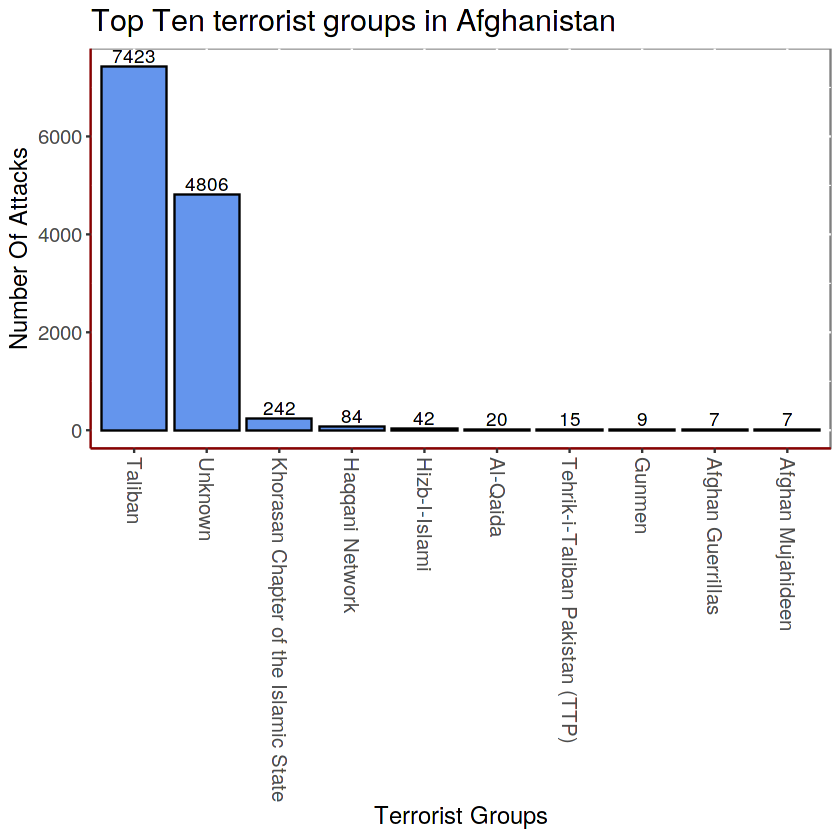

In [13]:
terror.afg <-terror %>% filter(country_txt=="Afghanistan") 

#Terrorist Group active
terror.afg <- terror.afg %>% mutate(gname = ifelse(gname == "Islamic State of Iraq and the Levant (ISIL)","ISIL",gname))
terror.afg <- terror.afg %>% mutate(gname = ifelse(gname == "Islamic State of Iraq (ISI)","ISI",gname))
topterror.afg <-terror.afg %>% count(gname) %>% arrange(desc(n)) %>% head(10)
#Top ten Terrorist groups involved in attacks in Afghanistan
topterror.afg %>%
  ggplot(mapping = aes(x=reorder(gname,-n),y=n))+
  geom_col(fill="cornflowerblue",col="black")+
  geom_text(aes( label = n, vjust = -0.25)) + 
  labs(title = "Top Ten terrorist groups in Afghanistan", y= "Number Of Attacks",x ="Terrorist Groups")+
  theme(axis.title.y = element_text(size=14),axis.title.x = element_text(size=14),panel.background = element_rect(fill = "white", colour = "grey50"),plot.title = element_text(size=18),axis.text.x = element_text(size=12, hjust = 0,angle = 270,vjust = 0.5),axis.text.y = element_text(size=12),axis.line = element_line(color = "darkred",size = 0.5, linetype = "solid"))

topterror.afg <-terror.afg %>% count(gname) %>% arrange(desc(n)) %>% head(5)
topterror.afg <- inner_join(terror.afg,topterror.afg,"gname")


The top terrorist groups in Afghanistan were Taliban, Khorasan Chapter of the Islamic State, Haqqani Network and Hizb-I-Islami. We'll use these for further analysis. 
For 4806 attacks, no terrorist group claimed responsibility. Because it is a significant number, we cannot rule it out.

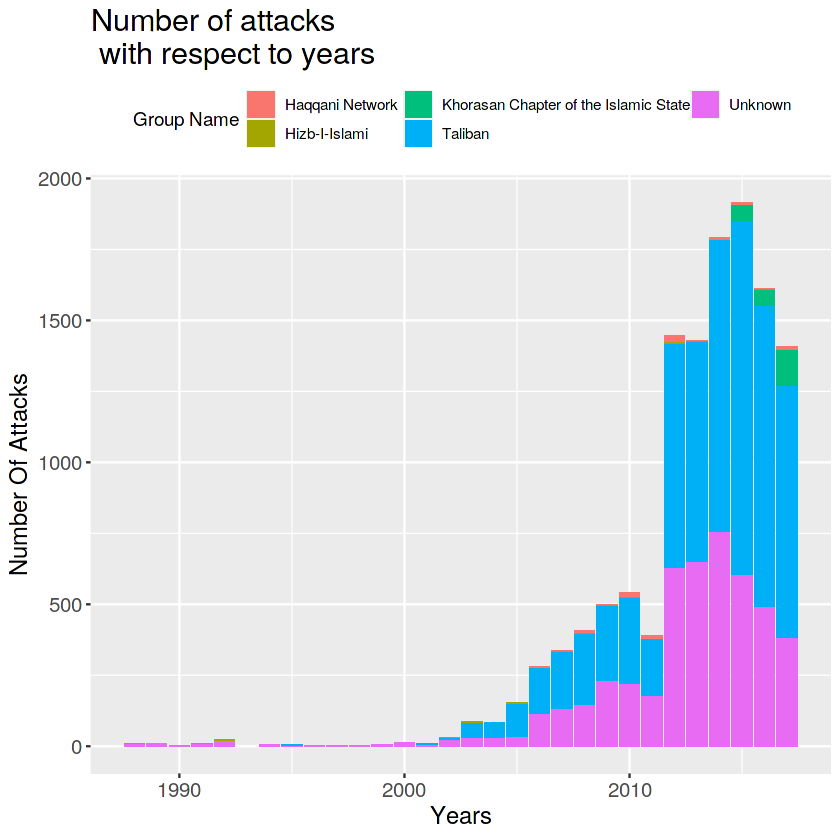

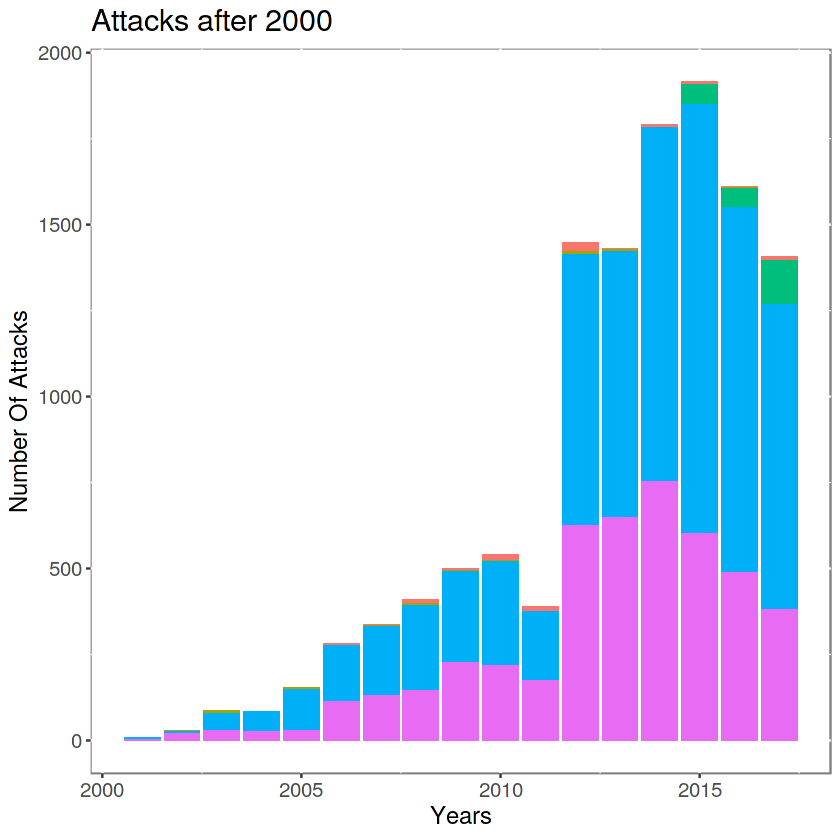

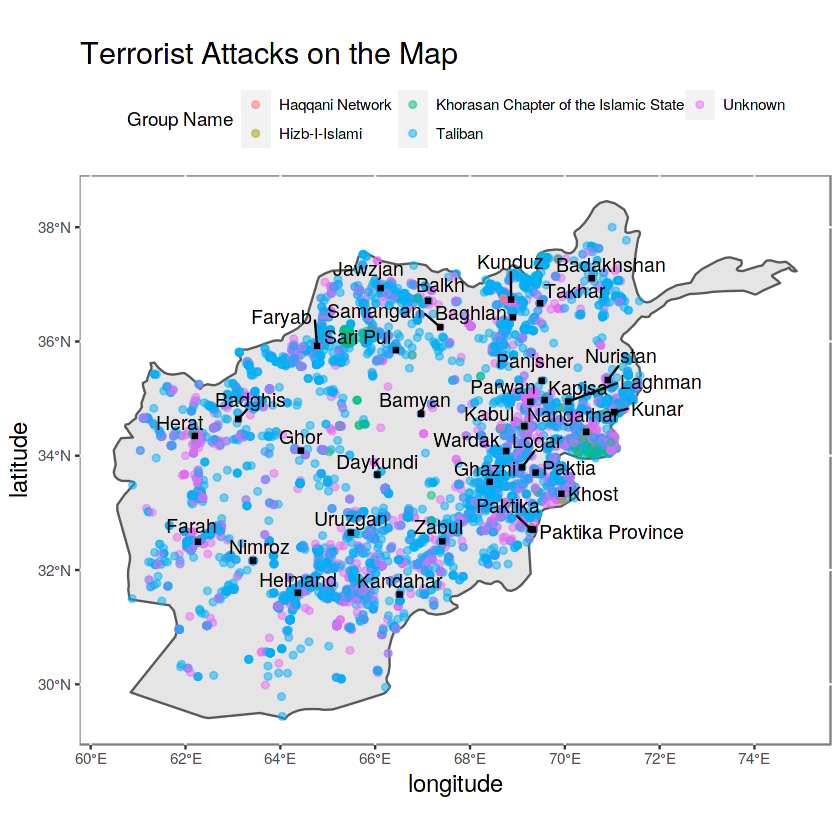

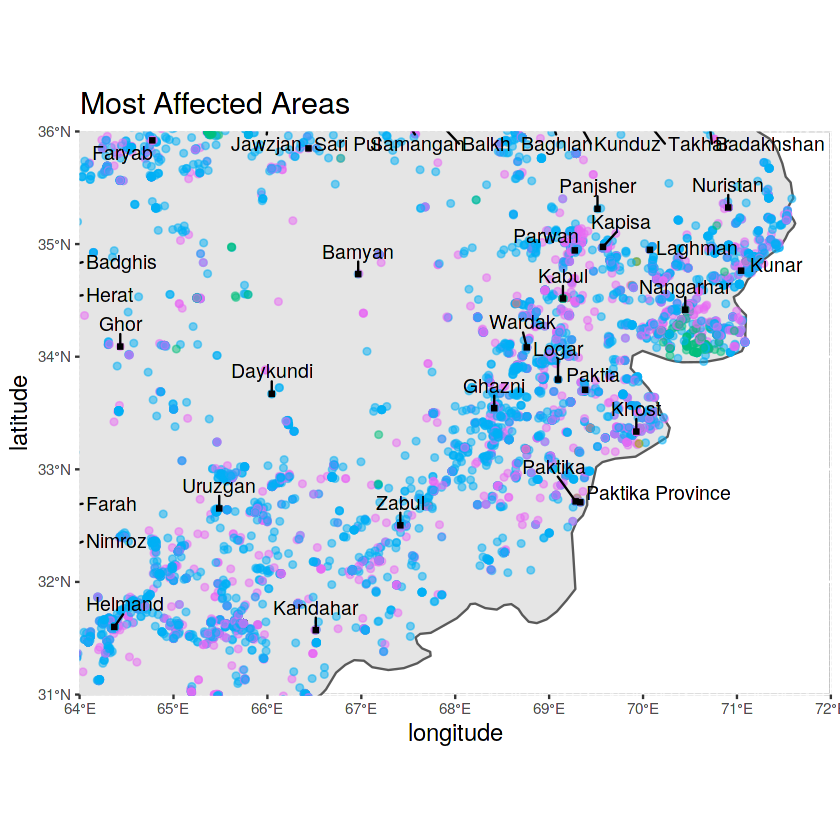

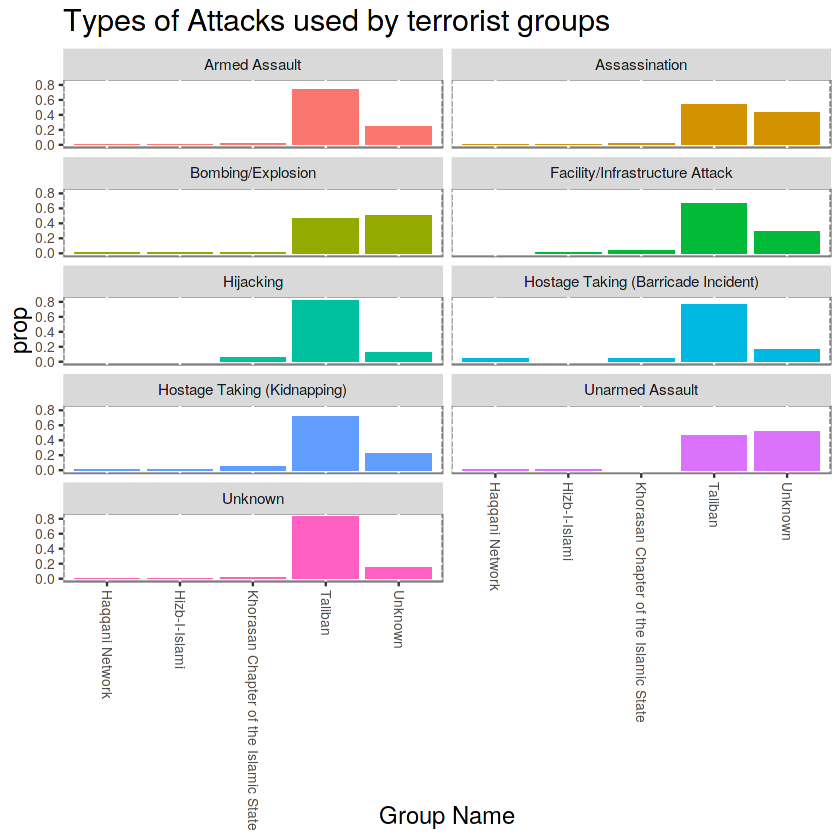

In [14]:
#Yearly share of attacks by top terrorist groups
topterror.afg <-terror.afg %>% count(gname) %>% arrange(desc(n)) %>% head(5)
topterror.afg <- inner_join(terror.afg,topterror.afg,"gname")
topterror.afg<- topterror.afg[!is.na(topterror.afg$longitude), ]
topterror.afg<- topterror.afg[!is.na(topterror.afg$latitude), ]

#Terrorist Activities with year
topterror.afg %>% ggplot(mapping = aes(x=iyear))+
  geom_bar(mapping = aes(fill=gname))+
  labs(title="Number of attacks \n with respect to years",x="Years",y="Number Of Attacks")+scale_fill_discrete(name="Group Name")+
  theme(axis.title.y = element_text(size=14),axis.title.x = element_text(size=14),axis.text.x = element_text(size=12),axis.text.y = element_text(size=12),plot.title = element_text(size=18),legend.position='top')+guides( fill = guide_legend( nrow = 2) )
topterror.afg %>% filter(iyear >2000) %>% ggplot(mapping = aes(x=iyear))+
  geom_bar(mapping = aes(fill=gname))+
  labs(title = "Attacks after 2000",x="Years",y="Number Of Attacks")+scale_fill_discrete(name="Group Name")+
  theme(axis.title.y = element_text(size=14),axis.title.x = element_text(size=14),axis.text.x = element_text(size=12),axis.text.y = element_text(size=12),panel.background = element_rect(fill = "white", colour = "grey50"),plot.title = element_text(size=18),legend.position='none')

#mapping terror attacks on map
t <- topterror.afg %>% group_by(provstate) %>% distinct(provstate,.keep_all = TRUE)
world <- ne_countries(scale='medium',returnclass = 'sf')
Afg <- subset(world, admin == "Afghanistan")
ggplot(data = Afg) +
  geom_sf()+
  geom_point(data = topterror.afg,mapping = aes(x=longitude,y= latitude,color=gname),alpha = 0.5)+
  geom_point(data = t ,mapping = aes(x=longitude,y= latitude),shape=15)+
  geom_text_repel(data = t ,mapping = aes(x=longitude,y= latitude,label=provstate),size =4,nudge_y =0.2)+
  scale_color_discrete(name="Group Name")+
  labs(title="Terrorist Attacks on the Map")+
  theme(axis.title.y = element_text(size=14),axis.title.x = element_text(size=14),legend.position = "top",panel.background = element_rect(fill = "white", colour = "grey50"),plot.title = element_text(size=18))+guides( color = guide_legend( nrow = 2) )

#mapping area with most dense attacks
ggplot(data = Afg) +
  geom_sf()+
  geom_point(data = topterror.afg,mapping = aes(x=longitude,y= latitude,color=gname),alpha = 0.5)+
  coord_sf(xlim = c(64,72), ylim = c(31, 36), expand = FALSE) +
  geom_point(data = t ,mapping = aes(x=longitude,y= latitude),shape=15)+
  geom_text_repel(data = t ,mapping = aes(x=longitude,y= latitude,label=provstate),size =4,nudge_y =0.2)+
  scale_color_discrete(name="Group Name")+
  labs(title="Most Affected Areas")+
  theme(axis.title.y = element_text(size=14),axis.title.x = element_text(size=14),legend.position = "none",panel.background = element_rect(fill = "white", colour = "grey50"),plot.title = element_text(size=18))

#linking types of attacks to Terrorist groups  
topterror.afg %>% ggplot(mapping = aes(x=gname,fill=attacktype1_txt))+
  geom_bar(position = "dodge",mapping = aes(y=..prop..,group=attacktype1_txt))+
  facet_wrap(~ attacktype1_txt,ncol=2)+
  labs(fill="Type Of Attacks")+
  theme(legend.position = "none")+
  labs(x="Group Name",title="Types of Attacks used by terrorist groups")+
  theme(axis.title.y = element_text(size=14),axis.title.x = element_text(size=14),panel.background = element_rect(fill = "white", colour = "grey50"),plot.title = element_text(size=18),legend.text = element_text(size = 8),legend.text.align = 0,legend.title = element_blank(),axis.text.y = element_text(size=8),axis.text.x = element_text(size=8, hjust = 0,angle = 270,vjust = 0.5))+
  guides( fill = guide_legend( nrow = 3) )



**Motivation**

Terrorist groups have different motivations to carry out terrorist activities. This motivation provides policymakers a foundation to address the problem of terrorism in their respective states. 
Since Iraq, Afghanistan and Pakistan are on the top with the highest number of incidents, we analyze the motivation of the terrorist groups in these countries. We use text mining for our analysis. We combine the motives of terrorist groups according to the countries. We first compare the motivation of attacks of Iraq with Afghanistan and Pakistan. We create a tibble that has the proportion of words that occurs in the three countries' terrorist motives. Then we use the proportion of worlds occurring in Iraq motive on the y-axis and for Afghanistan and Pakistan on the x-axis.  

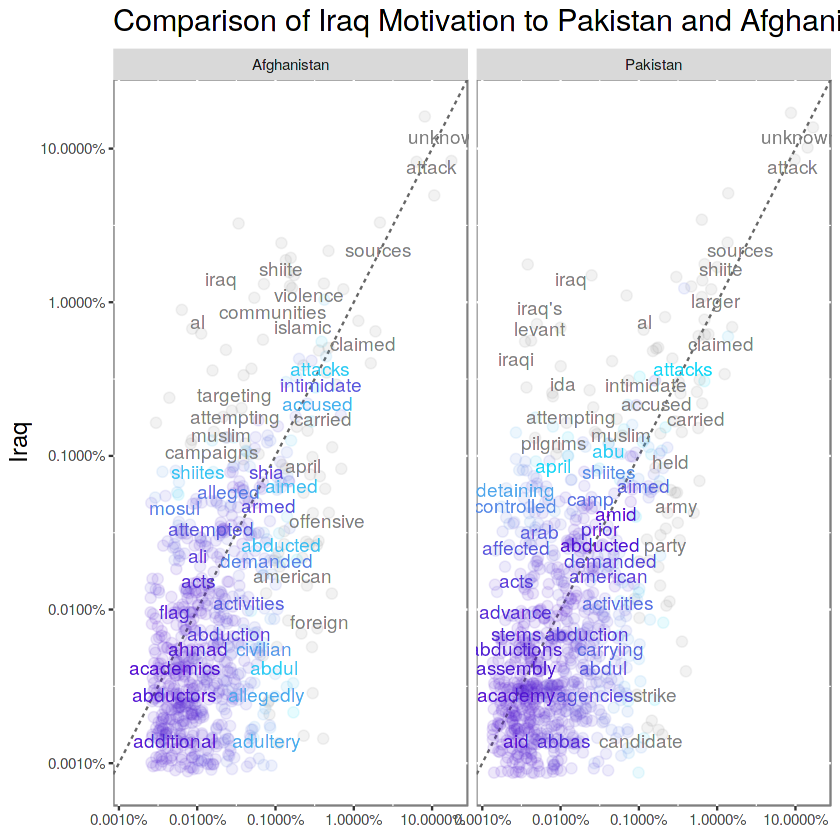

In [15]:
#creating a tibble with frequency of words 
terror.iraq1 <- terror.iraq %>% filter(motive!='NA')
terror.iraq1 <- cbind(terror.iraq1,"Seq"=1:nrow(terror.iraq1))
terror.iraq1 <- terror.iraq1 %>% select("Seq","motive")
suppressMessages(tidy.Irq.text <- terror.iraq1 %>% unnest_tokens( word, motive ) %>% anti_join( stop_words ))
terror.pak1 <- terror.pak %>% filter(motive!='NA')
terror.pak1 <- cbind(terror.pak1,"Seq"=1:nrow(terror.pak1))
terror.pak1 <- terror.pak1 %>% select("Seq","motive")
suppressMessages(tidy.pak.text <- terror.pak1 %>% unnest_tokens( word, motive ) %>% anti_join( stop_words ))
terror.afg1 <- terror.afg %>% filter(motive!='NA')
terror.afg1 <- cbind(terror.afg1,"Seq"=1:nrow(terror.afg1))
terror.afg1 <- terror.afg1 %>% select("Seq","motive")
suppressMessages(tidy.afg.text <- terror.afg1 %>% unnest_tokens( word, motive ) %>% anti_join( stop_words ))
frequency <- 
  bind_rows( mutate( tidy.Irq.text, country = "Iraq" ),
             mutate( tidy.pak.text, country = "Pakistan" ),
             mutate( tidy.afg.text, country = "Afghanistan" ) )%>%
  mutate( word = str_extract( word, "[a-z']+" ) ) %>% 
  count( country, word ) %>% 
  group_by( country ) %>% 
  mutate( proportion = n / sum( n ) ) %>% 
  select( -n ) %>%
  spread( country, proportion ) %>%
  select(word,Iraq,Afghanistan,Pakistan) %>%  
  gather(country, proportion, `Afghanistan`:`Pakistan` )


#comparing proportion of similiar words for the countries
frequency<- na.omit(frequency)
frequency %>% 
  ggplot( aes( x = proportion, y = `Iraq`, color = abs( `Iraq` - proportion ) ) ) + 
  geom_abline( color = "gray40", lty = 2 ) + 
  geom_jitter( alpha = 0.1, size = 2.5, width = 0.3, height = 0.3 ) + 
  geom_text(aes( label = word ), check_overlap = TRUE, vjust = 1.5 ) +
  scale_x_log10( labels = percent_format() ) +
  scale_y_log10( labels = percent_format() ) + 
  scale_color_gradient( limits = c(0, 0.001),low = "#5011D1", high = "#05D9F6" ) + facet_wrap( ~country, ncol = 2 ) + 
  theme(axis.title.y = element_text(size=14),axis.title.x = element_text(size=14),legend.position = "none",panel.background = element_rect(fill = "white", colour = "grey50"),plot.title = element_text(size=18) ) + 
  labs( y = "Iraq", x = NULL,title="Comparison of Iraq Motivation to Pakistan and Afghanistan" )



 From the above graph we can conclude that terrorists have a very similar motive to attack in these countries.

As we have seen that the Middle East and North Africa and South Asia are most terror affected region. Developing on this, we check if the motivation of Pakistan, Afghanistan(South Asia) and Iraq(Middle East and North Africa) is different from other countries in the Region.We will also compare negative sentiments of terrorist groups motives in Iraq,Pakistan and Afghanistan with other countries in the regions.


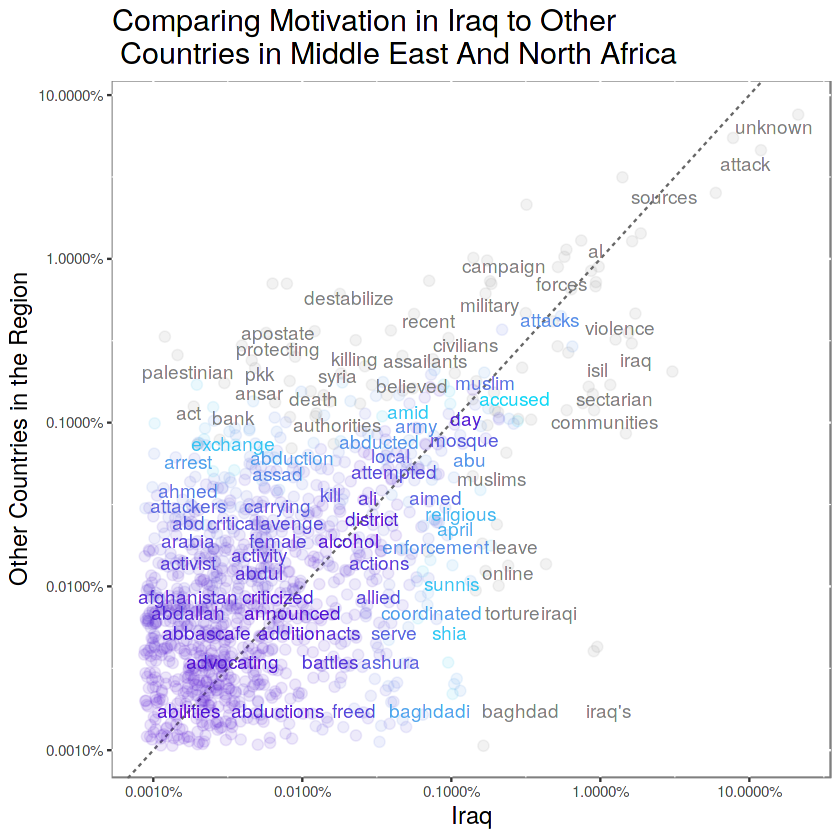

In [16]:
#creating a tibble with frequency of words for Iraq and other countries
other.Irq.region <- terror %>% filter(iyear> 2000 & region_txt=="Middle East & North Africa" & country_txt!="Iraq")
other.Irq.region <- other.Irq.region %>% filter(motive!='NA')
other.Irq.region  <- cbind(other.Irq.region ,"Seq"=1:nrow(other.Irq.region ))
other.Irq.region  <- other.Irq.region  %>% select("Seq","motive")
data("stop_words")
suppressMessages(other.Irq.region <- other.Irq.region %>% unnest_tokens( word, motive ) %>% anti_join( stop_words ))

frequency <- 
  bind_rows( mutate( tidy.Irq.text, country = "Iraq" ),
             mutate( other.Irq.region, country = "Other" ) )%>%
  mutate( word = str_extract( word, "[a-z']+" ) ) %>% 
  count( country, word ) %>% 
  group_by( country ) %>% 
  mutate( proportion = n / sum( n ) ) %>% 
  select( -n ) %>%
  spread( country, proportion )


frequency<- na.omit(frequency)
#comparing proportion of similiar words for the Iraq and other countries in the regions
frequency %>% 
  ggplot( aes( x = Iraq, y = Other, color = abs( `Iraq` - Other ) ) ) + 
  geom_abline( color = "gray40", lty = 2 ) + 
  geom_jitter( alpha = 0.1, size = 2.5, width = 0.3, height = 0.3 ) + 
  geom_text(aes( label = word ), check_overlap = TRUE, vjust = 1.5 ) +
  scale_x_log10( labels = percent_format() ) +
  scale_y_log10( labels = percent_format() ) + 
  scale_color_gradient( limits = c(0, 0.001), low = "#5011D1", high = "#05D9F6" )  + 
  theme( axis.title.y = element_text(size=14),axis.title.x = element_text(size=14),legend.position = "none",panel.background = element_rect(fill = "white", colour = "grey50"),plot.title = element_text(size=18) ) + 
  labs( y = "Other Countries in the Region", x = "Iraq",title="Comparing Motivation in Iraq to Other \n Countries in Middle East And North Africa" )


As we are comparing Iraq motivation to other countries in the region, we take the years after 2000 because after terrorist incidents in Iraq increased after year 2000. As evident that from the figure above, the motives of the attacks is similar in Iraq and other countries in the region.


Now, we compare sentiment in the motivation of attacks in Iraq and other countries in the region.

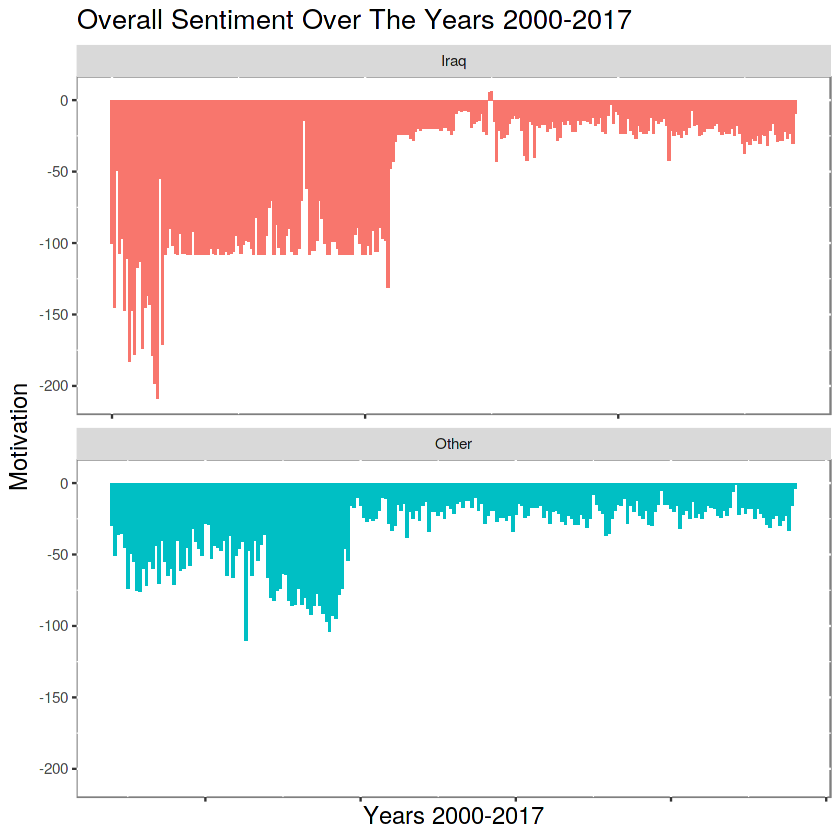

In [17]:
#comparing sentiments of Iraq and other countries in the region
sents1 <- 
  bind_rows( mutate( tidy.Irq.text, country = "Iraq" ),
             mutate( other.Irq.region, country = "Other" ))
sents <- 
  bind_rows( mutate( tidy.Irq.text, country = "Iraq" ),
             mutate( other.Irq.region, country = "Other" ))%>%
  select(word,country) %>%
  mutate(Seq =1:nrow(sents1))

suppressMessages(sentsgraphs <- sents %>% 
  inner_join(get_sentiments("bing")) %>% 
  count(country, index = Seq %/% 216  , sentiment) %>%
  spread(sentiment, n, fill = 0) %>% 
  mutate(sentiment = positive - negative))

p<- ggplot(sentsgraphs, aes(index, sentiment, fill = country)) +
  geom_col(show.legend = FALSE) + facet_wrap(~country, ncol = 1,scales = "free_x")+
  theme(axis.title.y = element_text(size=14),axis.title.x = element_text(size=14),plot.title=element_text(size=16),axis.text.x = element_blank(),panel.background = element_rect(fill = "white", colour = "grey50"))+
  labs(title = "Overall Sentiment Over The Years 2000-2017",x="Years 2000-2017",y="Motivation")

p


We conclude that overall negative sentiment was high in Iraq but it became very similar to other countries in the region after 2008.

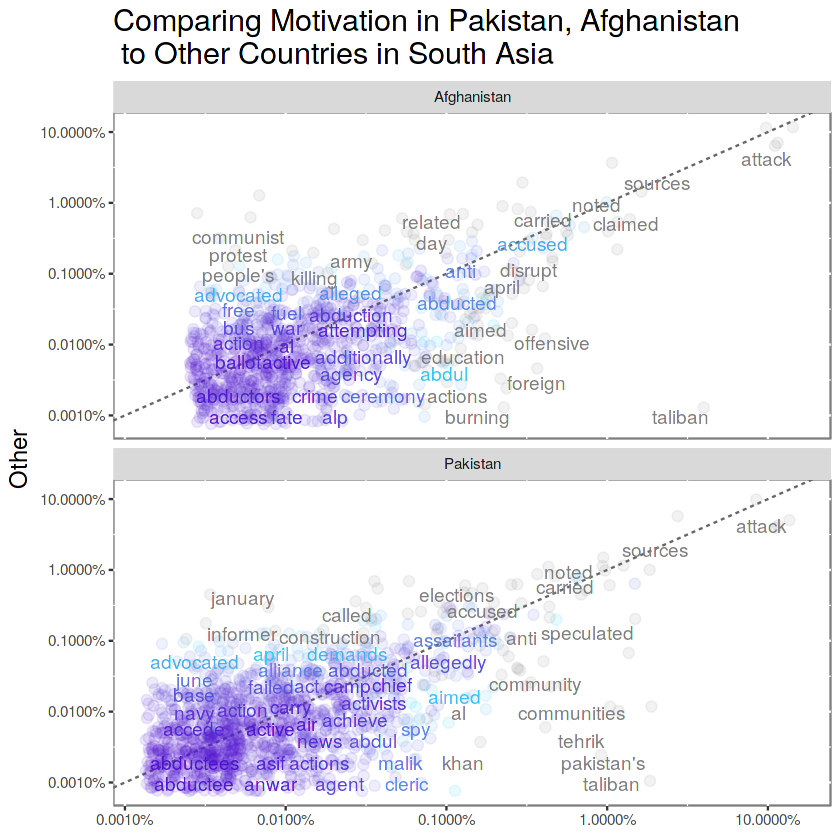

In [18]:
#creating a tibble with frequency of words for Afghanistan,Pakistan and other countries
other.asia.region <- terror %>% filter(iyear> 1995 & region_txt=="South Asia" & country_txt!="Afghanistan" & country_txt!="Pakistan")
other.asia.region <- other.asia.region %>% filter(motive!='NA')
other.asia.region  <- cbind(other.asia.region ,"Seq"=1:nrow(other.asia.region))
other.asia.region  <- other.asia.region  %>% select("Seq","motive")
data("stop_words")
suppressMessages(other.asia.region <- other.asia.region %>% unnest_tokens( word, motive ) %>% anti_join( stop_words ))

frequency <- 
  bind_rows( mutate( tidy.pak.text, country = "Pakistan" ),
             mutate( tidy.afg.text, country = "Afghanistan" ),
             mutate(other.asia.region, country = "Other"))%>%
  mutate( word = str_extract( word, "[a-z']+" ) ) %>% 
  count( country, word ) %>% 
  group_by( country ) %>% 
  group_by( country ) %>% 
  mutate( proportion = n / sum( n ) ) %>% 
  select( -n ) %>%
  spread( country, proportion ) %>%
  select(word,Other,Afghanistan,Pakistan) %>%  
  gather(country, proportion, `Afghanistan`:`Pakistan` )



#comparing proportion of similiar words for the Afghanistan,Pakistan and other countries in the regions
frequency<- na.omit(frequency)
frequency %>% 
  ggplot( aes( x = proportion, y = `Other`, color = abs( `Other` - proportion ) ) ) + 
  geom_abline( color = "gray40", lty = 2 ) + 
  geom_jitter( alpha = 0.1, size = 2.5, width = 0.3, height = 0.3 ) + 
  geom_text(aes( label = word ), check_overlap = TRUE, vjust = 1.5 ) +
  scale_x_log10( labels = percent_format() ) +
  scale_y_log10( labels = percent_format() ) + 
  scale_color_gradient( limits = c(0, 0.001),low = "#5011D1", high = "#05D9F6" ) + facet_wrap( ~country, ncol = 1 ) + 
  theme( axis.title.y = element_text(size=14),axis.title.x = element_text(size=14),legend.position = "none",panel.background = element_rect(fill = "white", colour = "grey50"),plot.title = element_text(size=18) ) + 
  labs( y = "Other", x = NULL,title="Comparing Motivation in Pakistan, Afghanistan \n to Other Countries in South Asia" )

Comparing Pakistan, Afghanistan and other countries in the region,we conclude that in Afghanistan attacks had motivation with foreign policy.


Now, we compare sentiment in motivation of attacks in Pakistan, Afghanistan and other countries in the region

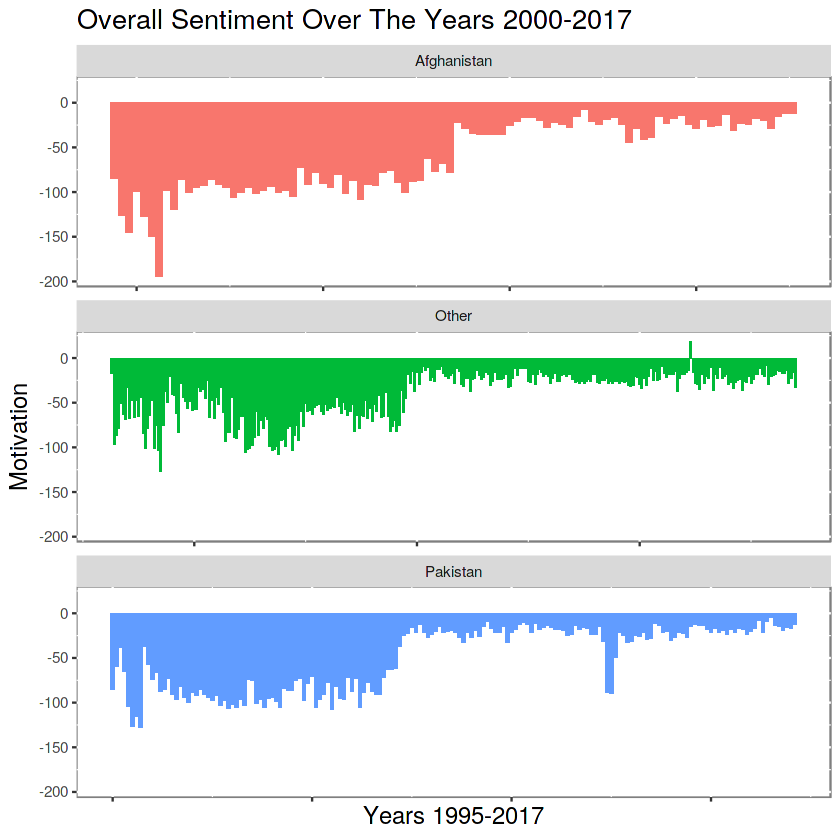

In [19]:
#comparing sentiments of Afghanistan,Pakistan and other countries in the region
sents1 <- 
  bind_rows( mutate( tidy.pak.text, country = "Pakistan" ),
             mutate( tidy.afg.text, country = "Afghanistan" ),
             mutate(other.asia.region, country = "Other"))
sents <- 
  bind_rows( mutate( tidy.pak.text, country = "Pakistan" ),
             mutate( tidy.afg.text, country = "Afghanistan" ),
             mutate(other.asia.region, country = "Other")
             )%>%
  select(word,country) %>%
  mutate(Seq =1:nrow(sents1))


suppressMessages(sentsgraphs <- sents %>% 
  inner_join(get_sentiments("bing")) %>% 
  count(country, index = Seq %/% 216  , sentiment) %>%
  spread(sentiment, n, fill = 0) %>% 
  mutate(sentiment = positive - negative))

p<-ggplot(sentsgraphs, aes(index, sentiment, fill = country)) +
  geom_col(show.legend = FALSE) + facet_wrap(~country, ncol = 1,scales = "free_x")+
  theme(axis.title.y = element_text(size=14),axis.title.x = element_text(size=14),plot.title=element_text(size=16),axis.text.x = element_blank(),panel.background = element_rect(fill = "white", colour = "grey50"))+
  labs(title = "Overall Sentiment Over The Years 2000-2017",x="Years 1995-2017",y="Motivation")

p


We conclude that Pakistan and other regions had the same negative sentiment from 1995-2017. However, for Afghanistan,the negative sentiment was higher in early years but eventually came down and became similar to other countries in the region. 

**Interpretations and Hypothesis**

   The countries with maximum terrorist events are Afghanistan, Pakistan and Iraq. When looking in the world object, we saw that these countries are least developed or develping countries. They have low gross domestic product and they are either low income countries or lower middle income countries.Hence we create three hypothesis. We will use years 2007-2015 because it the time when there was an increase in number of attacks.

1. Countries with lower income are high in number of attacks and lower in gross national income over the years.

`geom_smooth()` using formula 'y ~ x'



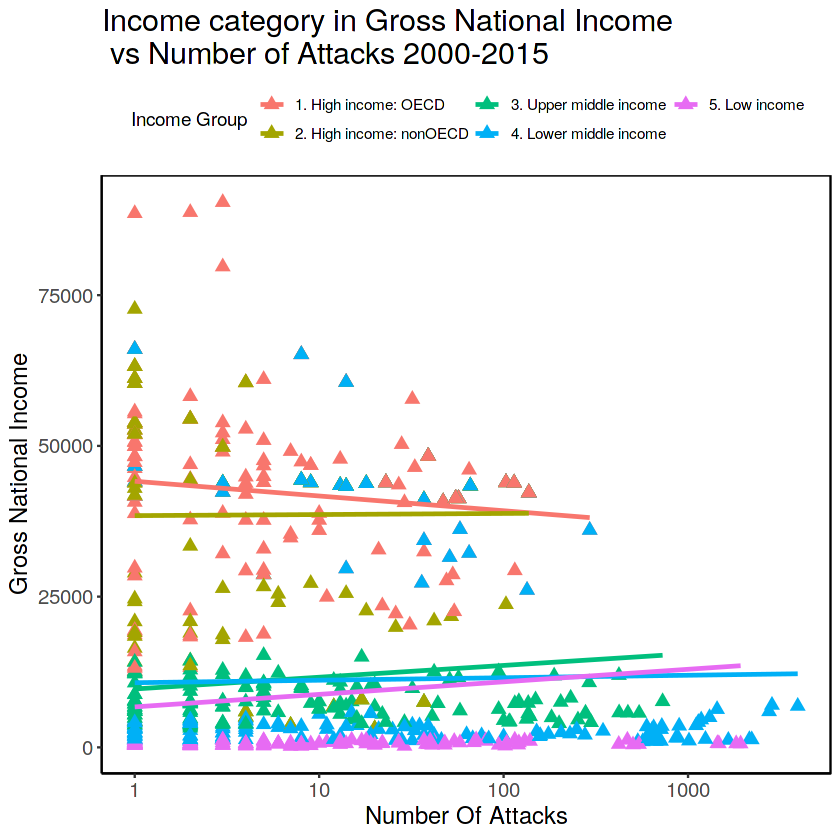

In [20]:
#Integrating GTD with WDI and World object. WDI and World Objectare loaded in first cell of this draft with GTD.

popular.gni <- popular.clean %>% filter(`Series Name`=="GNI per capita, Atlas method (current US$)")
popular.gni <- popular.gni %>% 
  select(-c(`Series Name`,`Country Code`)) %>%
  gather(key = "iyear",value = "GNI.Per.capita.Value",- `Country Name`)%>%
  rename(country_txt=`Country Name`)
popular.gni <- popular.gni %>% mutate(iyear=suppressWarnings(as.numeric(iyear)),GNI.Per.capita.Value=suppressWarnings(as.numeric(GNI.Per.capita.Value)) )
#Integrating GTD and WDI
graphcompa1 <- inner_join(terror.alongyears,popular.gni,by=c("country_txt","iyear")) %>%
  arrange(iyear) 
graphcompa1 <- graphcompa1[!(graphcompa1$GNI.Per.capita.Value == ".."), ]
graphcompa1 <- graphcompa1[!is.na(graphcompa1$GNI.Per.capita.Value), ]
graphcompa1 <- graphcompa1[!(graphcompa1$Number_Of_Attacks == ".."), ]
graphcompa1 <- graphcompa1[!is.na(graphcompa1$Number_Of_Attacks), ]
#Integrating with World Object
graphcompa1 <- inner_join(graphcompa1,test,by="country_txt")
graphcompa1 <- graphcompa1 %>% rename(`Income Group`=income_grp)
graphcompa1 %>% ggplot(mapping = aes(x=Number_Of_Attacks,y=GNI.Per.capita.Value,col=`Income Group`))+
  geom_point(shape=17,size=3)+scale_x_log10()+
  theme_classic()+
  theme(plot.title = element_text(size=18),axis.title.y = element_text(size=14),axis.title.x = element_text(size=14),axis.text.y = element_text(size=12),axis.text.x = element_text(size=12),legend.position = "top",panel.background = element_rect(fill = "white", colour = "black"),axis.line = element_line(color = "black",size = 0.5, linetype = "solid"))+
  labs(title="Income category in Gross National Income \n vs Number of Attacks 2000-2015",x= "Number Of Attacks",y="Gross National Income")+
  guides(col = guide_legend( nrow = 2 ))+
  geom_smooth(method = 'lm', se=FALSE)

From the figure, it is evident that High Income countries have least number of attacks and high Gross National Income. We also see that lower middle income,upper middle income and low income countries have very similar gross national income as defined by linear regression lines. However, lower middle income countries have more attacks than low income which nullify our hypothesis.

2. Developing Region and least developed region have more number of attack due to lower investment in Military expenditure

`geom_smooth()` using formula 'y ~ x'



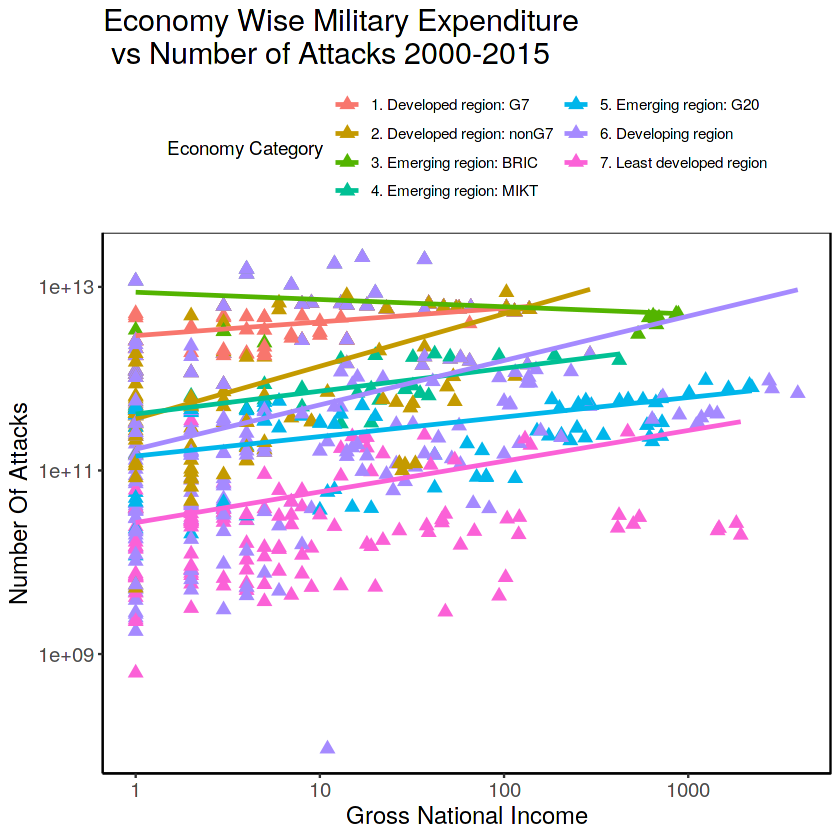

In [21]:
#Integrating GTD with WDI and World object. WDI and World Objectare loaded in first cell of this draft with GTD.
p1 <-popular.clean %>% filter(`Series Name`=="Military expenditure (% of GDP)")
p2 <-popular.clean %>% filter(`Series Name`=="GDP (current US$)")
p1 <- p1 %>% 
  select(-c(`Series Name`,`Country Code`)) %>%
  gather(key = "iyear",value = "Military Percent",- `Country Name`)
p2 <- p2 %>% 
  select(-c(`Series Name`,`Country Code`)) %>%
  gather(key = "iyear",value = "Total GDP",- `Country Name`)
popular.gni <- full_join(p1,p2,by=c("iyear","Country Name")) 
popular.gni <- popular.gni %>% mutate(iyear=suppressWarnings(as.numeric(iyear)),`Total GDP`=suppressWarnings(as.numeric(`Total GDP`)),`Military Percent`=suppressWarnings(as.numeric(`Military Percent` ))) %>%
  mutate(`Total Military Expenditure`= `Total GDP` *  `Military Percent` )%>%
  rename(country_txt=`Country Name`) %>% filter(`Total Military Expenditure` > 0 ) %>%
  select(-c(`Total GDP`,`Military Percent`))  
#Integrating GTD with WDI
temp<-  inner_join(terror.alongyears,popular.gni,by=c("country_txt","iyear")) %>%
  arrange(iyear) %>% ungroup()
graphcompa2 <- inner_join(terror.alongyears,popular.gni,by=c("country_txt","iyear")) %>%
  arrange(iyear) 
#Integrating with world object
graphcompa2 <- inner_join(graphcompa2,test,by="country_txt")
graphcompa2 <- graphcompa2 %>% rename(`Economy Category`=economy)
graphcompa2 <- graphcompa2 %>% rename(Regions=region_wb)
graphcompa2 %>% ggplot(mapping = aes(x=Number_Of_Attacks,y=`Total Military Expenditure`,col=`Economy Category`))+
  geom_point(shape=17,size=3)+scale_y_log10()+scale_x_log10()+
  theme_classic()+
  theme(plot.title = element_text(size=18),axis.title.y = element_text(size=14),axis.title.x = element_text(size=14),axis.text.y = element_text(size=12),axis.text.x = element_text(size=12),legend.position = "top",panel.background = element_rect(fill = "white", colour = "black"),axis.line = element_line(color = "black",size = 0.5, linetype = "solid"))+
  labs(title="Economy Wise Military Expenditure \n vs Number of Attacks 2000-2015",x= "Gross National Income",y="Number Of Attacks")+
  guides(col = guide_legend( nrow = 4 ))+
   geom_smooth(method = 'lm', se=FALSE)

We conclude that developing and Least-developed regions are present in a high number of attack. Developing region has more number of attacks as compared to Least-developed regions even though they have greater military expenditure.The lowest three regions in the economy category have highest number of attacks. The linear regression line also shows that with positive correlation between military expenditure and number of attacks for countries in all regions except Emerging region:BRIC. 



3. Countries that are ignored in investment have a greater number of terrorist activities due to economic discrimination. Regions like South Asia and the Middle East and North Africa should be lower in Foreign Direct Investment Inflows and greater in number of attacks.

`geom_smooth()` using formula 'y ~ x'



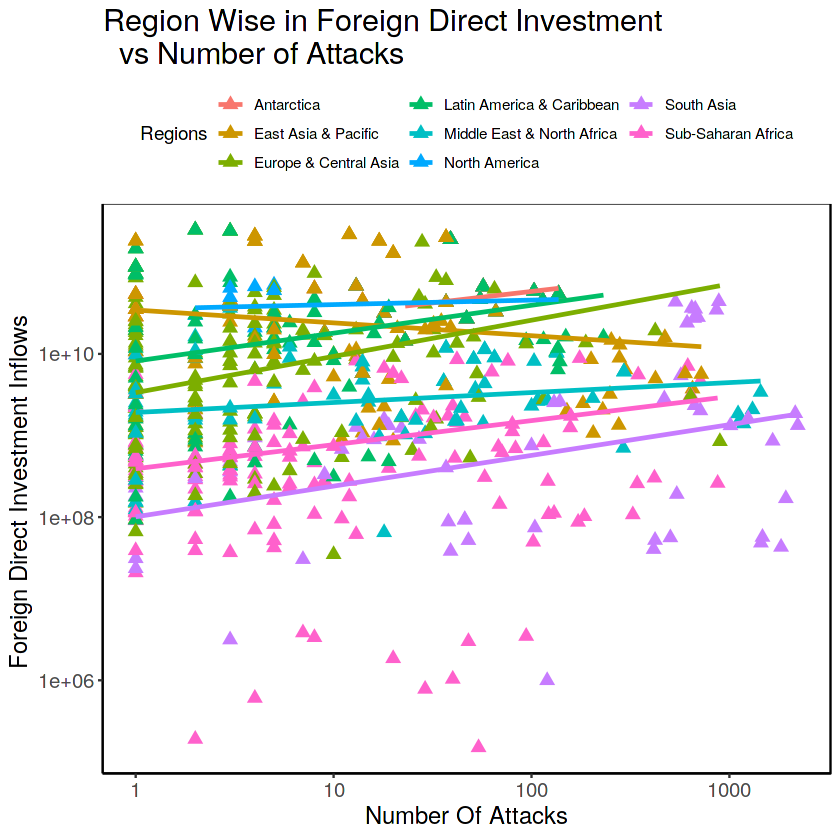

In [22]:
#Integrating GTD with WDI and World object. WDI and World Objectare loaded in first cell of this draft with GTD.
popular.FDI <- popular.clean %>% filter(`Series Name`=="Foreign direct investment, net inflows (BoP, current US$)")
popular.FDI <- popular.FDI %>% 
  select(-c(`Series Name`,`Country Code`)) %>%
  gather(key = "iyear",value = "FDI Inflows",- `Country Name`)%>%
  rename(country_txt=`Country Name`)
popular.FDI <- popular.FDI %>% mutate(iyear=suppressWarnings(as.numeric(iyear)),`FDI Inflows`=suppressWarnings(as.numeric(`FDI Inflows`))) %>%
  filter(`FDI Inflows`>0)
#Integrating GTD with WDI
graphcompa4 <- inner_join(terror.alongyears,popular.FDI,by=c("country_txt","iyear")) %>%
  arrange(iyear) 
#Integrating with World Object 
graphcompa4 <- inner_join(graphcompa4,test,by="country_txt")
graphcompa4 <- graphcompa4 %>% rename(`Income Group`=income_grp)
graphcompa4 <- graphcompa4 %>% rename(`Economy Category`=economy)
graphcompa4 <- graphcompa4 %>% rename(Regions=region_wb)
graphcompa4 %>% ggplot(mapping = aes(x=Number_Of_Attacks,y=`FDI Inflows`,col=`Regions`))+
  geom_point(shape=17,size=3)+scale_x_log10()+scale_y_log10()+
  theme_classic()+
  theme(plot.title = element_text(size=18),axis.title.y = element_text(size=14),axis.title.x = element_text(size=14),axis.text.y = element_text(size=12),axis.text.x = element_text(size=12),legend.position = "top",panel.background = element_rect(fill = "white", colour = "black"),axis.line = element_line(color = "black",size = 0.5, linetype = "solid"))+
  labs(title="Region Wise in Foreign Direct Investment\n  vs Number of Attacks",x= "Number Of Attacks",y="Foreign Direct Investment Inflows ")+
  guides(col = guide_legend( nrow = 3 ))+
   geom_smooth(method = 'lm', se=FALSE)

In our region-wise analysis above, we saw that South Asia, MiddleEast and North Africa had highest number of attacks and attacks are also increasing Southeast Asia and Sub-Saharan Africa. From the above graph, we see that Southeast Asia, MiddleEast and North Africa and Sub-Saharan Africa have lowest FDI investments and highest number of attacks. 

**Conclusion**

GTD provides us with an understanding of terrorism trends. The number of attacks along the years are evidence of terrorist groups that became active at that time providing us an idea of major political event of that time. Mapping of the activities on the map gives us an idea that most attacks were either in the capital city or very close to the capital city. The motivation of a major terrorist organization was very similar and they followed similar sentiment in comparison to other countries in their respective regions. Integration of GTD with World Development Indicators(WDI) answer some of our hypothesis that built from terrorism literature and our initial analysis. We considered the second increase in the number of terrorist events from 2007-2017 for our integration because it is the most significant and recent. From one of the hypothesis, we concluded that Upper Middle, Lower Middle, and low-income countries have lower gross national income. And lower-middle-income countries have more attacks than low-income countries. In WDI, we had many NA values. If the dataset was more complete, we could conclude our other hypothesis with certainty.

**Referenes**

1. Krueger, A. B., & Malečková, J. (2003). Education, Poverty and Terrorism: Is There a Causal Connection? Journal of Economic Perspectives, 17(4), 119–144.
2. Sandler, T. (2014). The analytical study of terrorism: Taking stock. Journal of Peace Research, 51(2),257–271.
3. Swain, A. (2017). Terrorism Around The World 
4. Bank, W. (2019).World Development Indicators | DataBank.https://databank.worldbank.org/source/
world-development-indicators.
